
### 목적
- 이커머스 도메인에서 실무에서 사용하는 유사한 데이터를 이용하여
- 머신러닝 및 시계열 예측 모델을 만드는 실제 과정을 제공한다.
- 이를 통해 각자가 자신만의 포트폴리오를 만들 수 있도록 기반을 제공하고,
- 포트폴리오를 통해 실력을 증명할 수 있는 결과물을 제공하며 이직이나 취업에 활용하도록 한다.


#### 주요 프로젝트는 아래와 같습니다:
- **Generative AI 모델 개발**
- 수요예측, 추천/검색 개인화 모델 개발 및 운영
- 가격 최적화 모델 구축
- 다양한 머신러닝 모델을 개발하고 서비스 배포를 위해 MLOPS 환경 구축
- 로그를 이용한 고객 행동 분석, 세그멘테이션, 마케팅 효율화 모델 개발
- AARRR 프레임워크 기반 대시보드 구축 및 비즈니스 헬스 모니터링

### 목차
- 1강: 준비 및 EDA
  - 환경 세팅 및 데이터셋 준비
  - 데이터 탐색 및 전처리
  - EDA 통한 데이터 이해 및 시각화
- 2강: 모델링 개요
    - 예측 모델 개요 및 이론 설명
    - 피처 엔지니어링
    - 베이스라인 예측 모델 구축
- 3강: 모델 성능 개선
    - 예측 모델 성능 개선 및 고도화
    - 하이브리드, 피처 엔지니어링 고도화 및 파라메터 최적화

- 4강: 대시보드 구축
    - Streamlit을 활용한 어플리케이션 구축
    - Streamlit을 이용한 서비스 배포 준비


### 필수 개발 환경 소개

#### 구글 Colab

#### Python
- **주요 라이브러리**: Pandas, Numpy, Matplotlib, Seaborn, Scikit-learn 등

#### Streamlit



### 데이터셋 불러오기

- **캐글에 공개된 농산물 가격 예측 AI 경진대회의 데이터를 이용합니다.**
  - [https://dacon.io/competitions/official/235801/overview/description]https://dacon.io/competitions/official/235801/overview/description
- **데이터셋(CSV 포맷) 및 상세 프로젝트 설명 in Notion:**
    - [https://www.nongnet.or.kr/front/index.do]https://www.nongnet.or.kr/front/index.do

In [1]:
# 마운트
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np

# 각자 경로에 맞게 수정
df = pd.read_csv("/content/drive/MyDrive/aibootcamp/딥러닝/e-commerce 예측 포트폴리오/data/train.csv")

# 데이터 미리보기
df.head()

,date,요일,배추_거래량(kg),배추_가격(원/kg),무_거래량(kg),무_가격(원/kg),양파_거래량(kg),양파_가격(원/kg),건고추_거래량(kg),건고추_가격(원/kg),...,청상추_거래량(kg),청상추_가격(원/kg),백다다기_거래량(kg),백다다기_가격(원/kg),애호박_거래량(kg),애호박_가격(원/kg),캠벨얼리_거래량(kg),캠벨얼리_가격(원/kg),샤인마스캇_거래량(kg),샤인마스캇_가격(원/kg)
0,2016-01-01,금요일,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2016-01-02,토요일,80860.0,329.0,80272.0,360.0,122787.5,1281.0,3.0,11000.0,...,5125.0,9235.0,434.0,2109.0,19159.0,2414.0,880.0,2014.0,0.0,0.0
2,2016-01-03,일요일,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2016-01-04,월요일,1422742.5,478.0,1699653.7,382.0,2315079.0,1235.0,699.0,4464.0,...,38525.5,7631.0,500702.0,2046.0,620539.0,2018.0,2703.8,3885.0,0.0,0.0
4,2016-01-05,화요일,1167241.0,442.0,1423482.3,422.0,2092960.1,1213.0,1112.6,4342.0,...,32615.0,6926.0,147638.0,2268.0,231958.0,2178.0,8810.0,2853.0,0.0,0.0


In [ ]:
df.shape

(1733, 44)

In [ ]:
# 메인품목: 배추, 무, 마늘, 양파, 대파, 건고추, 깻잎
df.columns

Index(['date', '요일', '배추_거래량(kg)', '배추_가격(원/kg)', '무_거래량(kg)', '무_가격(원/kg)',
       '양파_거래량(kg)', '양파_가격(원/kg)', '건고추_거래량(kg)', '건고추_가격(원/kg)',
       '마늘_거래량(kg)', '마늘_가격(원/kg)', '대파_거래량(kg)', '대파_가격(원/kg)',
       '얼갈이배추_거래량(kg)', '얼갈이배추_가격(원/kg)', '양배추_거래량(kg)', '양배추_가격(원/kg)',
       '깻잎_거래량(kg)', '깻잎_가격(원/kg)', '시금치_거래량(kg)', '시금치_가격(원/kg)',
       '미나리_거래량(kg)', '미나리_가격(원/kg)', '당근_거래량(kg)', '당근_가격(원/kg)',
       '파프리카_거래량(kg)', '파프리카_가격(원/kg)', '새송이_거래량(kg)', '새송이_가격(원/kg)',
       '팽이버섯_거래량(kg)', '팽이버섯_가격(원/kg)', '토마토_거래량(kg)', '토마토_가격(원/kg)',
       '청상추_거래량(kg)', '청상추_가격(원/kg)', '백다다기_거래량(kg)', '백다다기_가격(원/kg)',
       '애호박_거래량(kg)', '애호박_가격(원/kg)', '캠벨얼리_거래량(kg)', '캠벨얼리_가격(원/kg)',
       '샤인마스캇_거래량(kg)', '샤인마스캇_가격(원/kg)'],
      dtype='object')

In [ ]:
# 가격 텍스트가 있는 컬럼만 추출
price_columns = [col for col in df.columns if '가격' or 'date' in col]
#price_columns

In [ ]:
df = df[price_columns]
df.columns = df.columns.str.replace("_가격(원/kg)", "")
prd = ['date', '배추', '무', '마늘', '양파', '대파', '건고추', '깻잎']
df = df[prd]

In [ ]:
df.head()

,date,배추,무,마늘,양파,대파,건고추,깻잎
0,2016-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2016-01-02,329.0,360.0,5475.0,1281.0,1704.0,11000.0,13242.0
2,2016-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2016-01-04,478.0,382.0,5210.0,1235.0,1716.0,4464.0,9923.0
4,2016-01-05,442.0,422.0,5387.0,1213.0,1715.0,4342.0,9529.0


In [ ]:
test = pd.read_csv("/content/drive/MyDrive/aibootcamp/딥러닝/e-commerce 예측 포트폴리오/data/test_2020-11-05.csv")

test = test[price_columns]
test.columns = test.columns.str.replace("_가격(원/kg)", "")
test = test[prd]

In [ ]:
test.head()

,date,배추,무,마늘,양파,대파,건고추,깻잎
0,2020-09-29,1787.0,1190.0,5404.0,966.0,2682.0,25873.0,11298.0
1,2020-09-30,1551.0,984.0,5575.0,857.0,2774.0,9929.0,6476.0
2,2020-10-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2020-10-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2020-10-03,0.0,835.0,0.0,0.0,3784.0,0.0,5091.0


In [ ]:
import pandas as pd

def load_data_set(file_path, target_prd, kor_to_eng):
    """
    모델링 학습, 검증 dataset 추출하기

    Args:
    file_path (str): CSV 파일 경로
    target_prd (list): 예측 대상 품목 리스트
    kor_to_eng (dict): 한글을 영어로 레이블 변경하는 딕셔너리

    Returns:
    pd.DataFrame: 예측 대상 품목을 포함한 DataFrame
    """
    # 데이터 불러오기
    df = pd.read_csv(file_path)

    # 가격 및 날짜 관련 컬럼 추출
    price_columns = [col for col in df.columns if '가격' in col or 'date' in col]
    df = df[price_columns]  # 가격 및 날짜 컬럼만 남김

    # 가격 컬럼의 단위 '(kg)' 제거
    df.columns = df.columns.str.replace("_가격\(원/kg\)", "", regex=True)

    # 한글 컬럼명을 영어로 변경
    df.columns = df.columns.map(kor_to_eng)

    # 날짜 형식 변환
    df['date'] = pd.to_datetime(df['date'])

    # 데이터 확인 및 반환
    if df is not None:
        print("Data loaded successfully")
        print(df[target_prd].head())
        return df[target_prd]
    else:
        print("Data loading failed")
        return None

In [ ]:
# 예측 대상 품목
target_prd = ['date', 'cabbage', 'radish', 'garlic', 'onion', 'daikon', 'cilantro', 'artichoke']
kor_to_eng = {
    'date': 'date',
    '배추': 'cabbage',
    '무': 'radish',
    '마늘': 'garlic',
    '양파': 'onion',
    '대파': 'daikon',
    '건고추': 'cilantro',
    '깻잎': 'artichoke'
}

# 경로
train_file_path = "/content/drive/MyDrive/aibootcamp/딥러닝/e-commerce 예측 포트폴리오/data/train.csv"
test_file_path = "/content/drive/MyDrive/aibootcamp/딥러닝/e-commerce 예측 포트폴리오/data/test_2020-11-05.csv"

In [ ]:
# 훈련 데이터 생성
train_data = load_data_set(train_file_path, target_prd, kor_to_eng)

# 검증 데이터셋 생성
test_data = load_data_set(test_file_path, target_prd, kor_to_eng)

Data loaded successfully
        date  cabbage  radish  garlic   onion  daikon  cilantro  artichoke
0 2016-01-01      0.0     0.0     0.0     0.0     0.0       0.0        0.0
1 2016-01-02    329.0   360.0  5475.0  1281.0  1704.0   11000.0    13242.0
2 2016-01-03      0.0     0.0     0.0     0.0     0.0       0.0        0.0
3 2016-01-04    478.0   382.0  5210.0  1235.0  1716.0    4464.0     9923.0
4 2016-01-05    442.0   422.0  5387.0  1213.0  1715.0    4342.0     9529.0
Data loaded successfully
        date  cabbage  radish  garlic  onion  daikon  cilantro  artichoke
0 2020-09-29   1787.0  1190.0  5404.0  966.0  2682.0   25873.0    11298.0
1 2020-09-30   1551.0   984.0  5575.0  857.0  2774.0    9929.0     6476.0
2 2020-10-01      0.0     0.0     0.0    0.0     0.0       0.0        0.0
3 2020-10-02      0.0     0.0     0.0    0.0     0.0       0.0        0.0
4 2020-10-03      0.0   835.0     0.0    0.0  3784.0       0.0     5091.0


In [ ]:
train_data.head()

,date,cabbage,radish,garlic,onion,daikon,cilantro,artichoke
0,2016-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2016-01-02,329.0,360.0,5475.0,1281.0,1704.0,11000.0,13242.0
2,2016-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2016-01-04,478.0,382.0,5210.0,1235.0,1716.0,4464.0,9923.0
4,2016-01-05,442.0,422.0,5387.0,1213.0,1715.0,4342.0,9529.0


In [ ]:
test_data.head()

,date,cabbage,radish,garlic,onion,daikon,cilantro,artichoke
0,2020-09-29,1787.0,1190.0,5404.0,966.0,2682.0,25873.0,11298.0
1,2020-09-30,1551.0,984.0,5575.0,857.0,2774.0,9929.0,6476.0
2,2020-10-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2020-10-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2020-10-03,0.0,835.0,0.0,0.0,3784.0,0.0,5091.0


In [ ]:
print(train_data.shape)
print(test_data.shape)

(1733, 8)
(37, 8)


In [ ]:
# 날짜에 누락이 있는지 확인하기 위해 가상 데이터셋 생성
start_date = '2016-01-01'
end_date = '2020-09-28'
date_range = pd.date_range(start=start_date, end=end_date, freq='D')

start_date1 = '2020-09-29'
end_date1 = '2020-11-04'
date_range1 = pd.date_range(start=start_date1, end=end_date1, freq='D')

print(date_range.shape)
print(date_range1.shape)

(1733,)
(37,)


In [ ]:
print(len(date_range) == len(train_data))
print(len(date_range1) == len(test_data))

True
True


### EDA를 통한 데이터 이해
- 데이터의 분포, 트렌드, 통계수치, 상관관계 등 여러 분석
- 이상치, 특이값 여부, 분포 변환 필요성 등을 충분히 고려


In [ ]:
train_data.head()

,date,cabbage,radish,garlic,onion,daikon,cilantro,artichoke
0,2016-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2016-01-02,329.0,360.0,5475.0,1281.0,1704.0,11000.0,13242.0
2,2016-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2016-01-04,478.0,382.0,5210.0,1235.0,1716.0,4464.0,9923.0
4,2016-01-05,442.0,422.0,5387.0,1213.0,1715.0,4342.0,9529.0


In [ ]:
print(train_data.info())
print(test_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1733 entries, 0 to 1732
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       1733 non-null   datetime64[ns]
 1   cabbage    1733 non-null   float64       
 2   radish     1733 non-null   float64       
 3   garlic     1733 non-null   float64       
 4   onion      1733 non-null   float64       
 5   daikon     1733 non-null   float64       
 6   cilantro   1733 non-null   float64       
 7   artichoke  1733 non-null   float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 108.4 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       37 non-null     datetime64[ns]
 1   cabbage    37 non-null     float64       
 2   radish     37 non-null     float64       
 3   garlic     37 no

In [ ]:
train_data = train_data.sort_values(by='date', ascending=True)
train_data.head()
test_data = test_data.sort_values(by='date')

In [ ]:
print(train_data.head(1)['date'])
print(train_data.tail(1)['date'])
print("")
print(test_data.head(1)['date'])
print(test_data.tail(1)['date'])

0   2016-01-01
Name: date, dtype: datetime64[ns]
1732   2020-09-28
Name: date, dtype: datetime64[ns]

0   2020-09-29
Name: date, dtype: datetime64[ns]
36   2020-11-04
Name: date, dtype: datetime64[ns]


In [ ]:
print(train_data.shape)
print(test_data.shape)

(1733, 8)
(37, 8)


In [ ]:
train_data.drop("date", axis=1).describe().astype(int)

,cabbage,radish,garlic,onion,daikon,cilantro,artichoke
count,1733,1733,1733,1733,1733,1733,1733
mean,597,490,3433,652,1160,9537,4614
std,410,299,1751,366,645,8757,2733
min,0,0,0,0,0,0,0
25%,335,324,2687,467,853,6015,3387
50%,577,453,3953,638,1188,8607,4492
75%,805,717,4758,925,1551,12500,5942
max,5000,1360,6415,2000,3182,170836,14326


In [ ]:
test_data.drop("date", axis=1).describe().astype(int)

,cabbage,radish,garlic,onion,daikon,cilantro,artichoke
count,37,37,37,37,37,37,37
mean,594,523,4131,843,1934,16237,4202
std,467,317,2209,452,994,9417,2381
min,0,0,0,0,0,0,0
25%,437,433,4881,966,2010,14654,3927
50%,521,549,5218,1068,2268,18353,5000
75%,636,652,5325,1109,2412,24013,5311
max,1787,1190,5762,1160,3784,25873,11298


In [ ]:
print(train_data.isnull().sum())
print(test_data.isnull().sum())

date         0
cabbage      0
radish       0
garlic       0
onion        0
daikon       0
cilantro     0
artichoke    0
dtype: int64
date         0
cabbage      0
radish       0
garlic       0
onion        0
daikon       0
cilantro     0
artichoke    0
dtype: int64


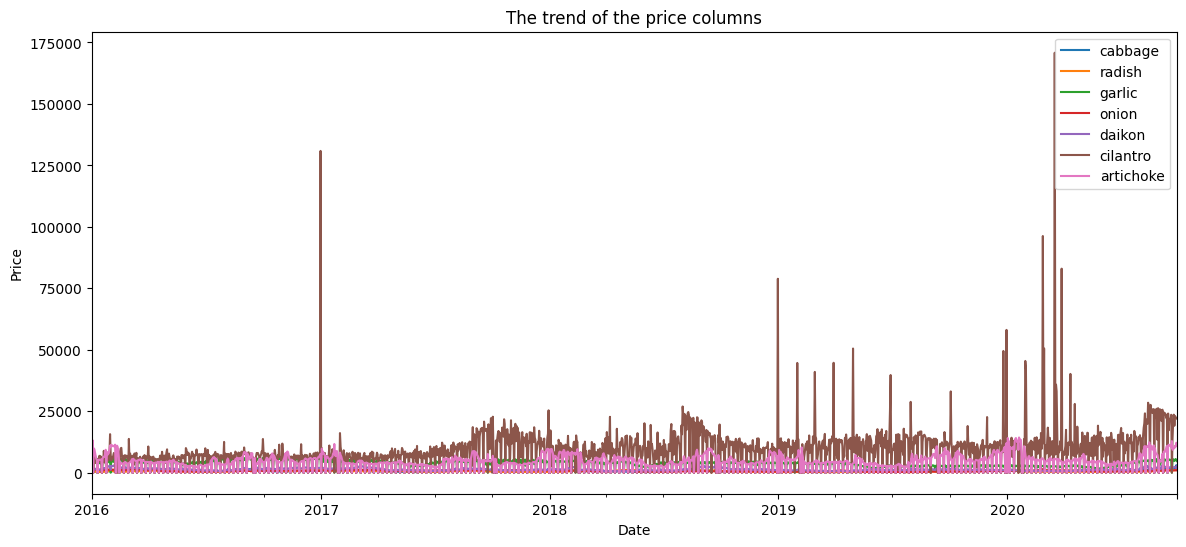

In [ ]:
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt

train_data.set_index("date").plot(figsize=(14,6))

plt.title("The trend of the price columns")
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()

In [ ]:
def calculate_rolling_mean(data, window=7):
    """
    변동성이 큰 가격을 갖는 품목에 대한 rolling mean 계산

    Args:
        data (pd.DataFrame): DataFrame containing price columns.
        window (int): window size for rolling mean (default is 7 days).

    Returns:
        pd.DataFrame: DataFrame with rolling mean applied to price columns.
    """
    # Exclude 'date' column from rolling mean calculation
    data_rolling_mean = data.drop(columns=['date']).rolling(window=window, min_periods=1).mean()

    # Merge 'date' column back to the DataFrame
    data_rolling_mean['date'] = data['date']

    return data_rolling_mean

# Calculate rolling mean on the training data
train_data_roll = calculate_rolling_mean(train_data)

In [ ]:
train_data_roll.head()

,cabbage,radish,garlic,onion,daikon,cilantro,artichoke,date
0,0.000000,0.0,0.00,0.0,0.0,0.000000,0.00,2016-01-01
1,164.500000,180.0,2737.50,640.5,852.0,5500.000000,6621.00,2016-01-02
2,109.666667,120.0,1825.00,427.0,568.0,3666.666667,4414.00,2016-01-03
3,201.750000,185.5,2671.25,629.0,855.0,3866.000000,5791.25,2016-01-04
4,249.800000,232.8,3214.40,745.8,1027.0,3961.200000,6538.80,2016-01-05


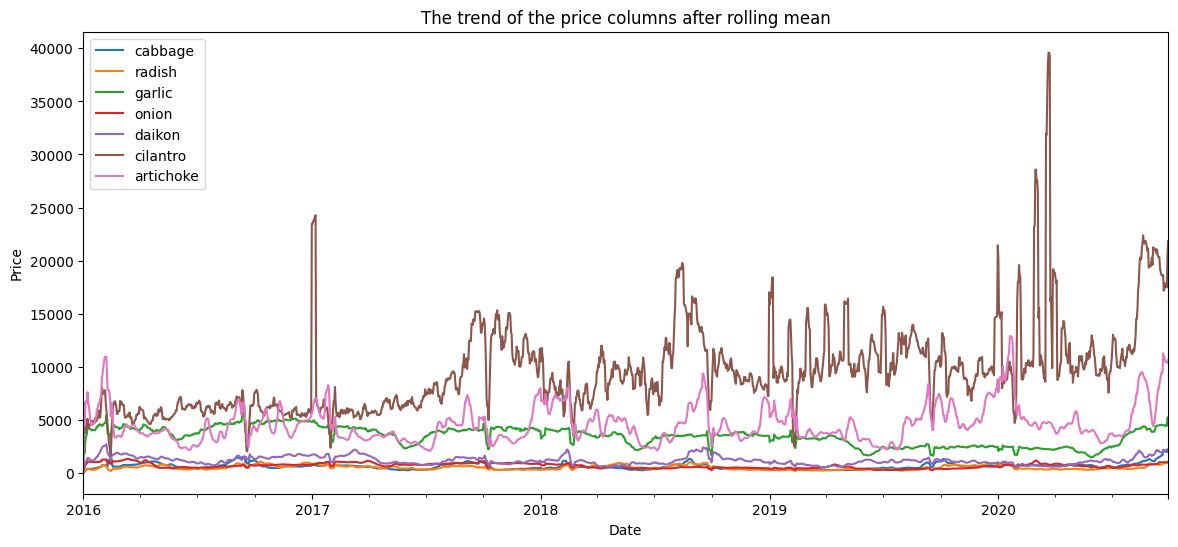

In [ ]:
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt

train_data_roll.set_index("date").plot(figsize=(14,6))

plt.title("The trend of the price columns after rolling mean")
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()

In [ ]:
# 한국-영어
kor_to_eng = {
    'date': 'date',
    '배추': 'cabbage',
    '무': 'radish',
    '마늘': 'garlic',
    '양파': 'onion',
    '대파': 'daikon',
    '건고추': 'cilantro',
    '깻잎': 'artichoke'
}

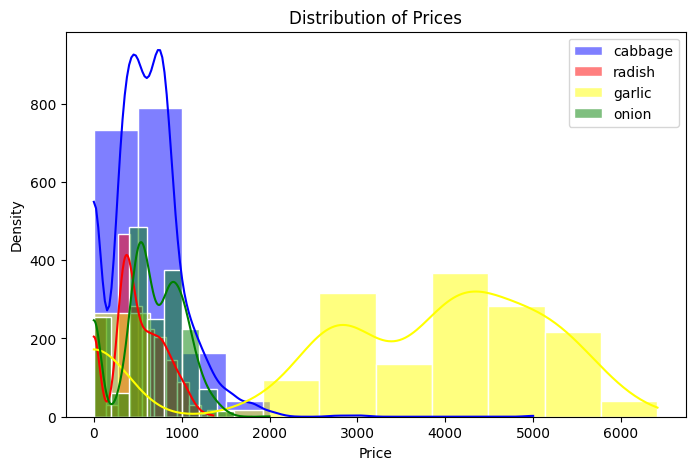

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the matplotlib figure (optional)
plt.figure(figsize=(8, 5))

# Plot using seaborn histplot for each product
sns.histplot(train_data['cabbage'], bins=10, kde=True, label='cabbage', color='blue', edgecolor='white')
sns.histplot(train_data['radish'], bins=10, kde=True, label='radish', color='red', edgecolor='white')
sns.histplot(train_data['garlic'], bins=10, kde=True, label='garlic', color='yellow', edgecolor='white')
sns.histplot(train_data['onion'], bins=10, kde=True, label='onion', color='green', edgecolor='white')

plt.title('Distribution of Prices', fontsize=12)
plt.xlabel('Price', fontsize=10)
plt.ylabel('Density', fontsize=10)
plt.legend()
plt.show()

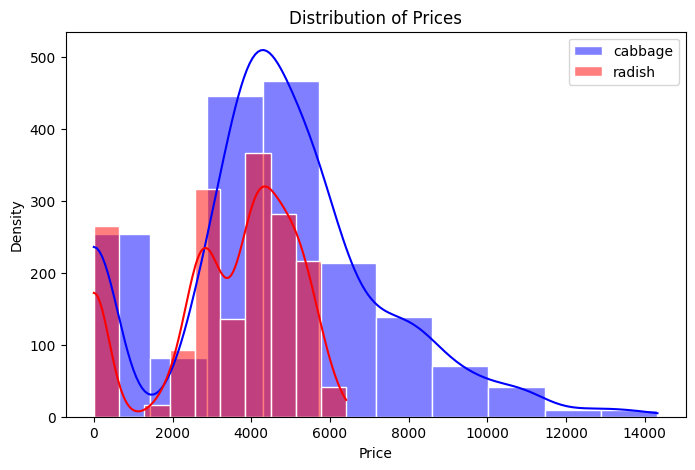

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the matplotlib figure (optional)
plt.figure(figsize=(8, 5))

# Plot using seaborn histplot for each product
sns.histplot(train_data['artichoke'], bins=10, kde=True, label='cabbage', color='blue', edgecolor='white')
sns.histplot(train_data['garlic'], bins=10, kde=True, label='radish', color='red', edgecolor='white')

plt.title('Distribution of Prices', fontsize=12)
plt.xlabel('Price', fontsize=10)
plt.ylabel('Density', fontsize=10)
plt.legend()
plt.show()

In [ ]:
train_data.drop("date", axis=1).describe().astype(int)

,cabbage,radish,garlic,onion,daikon,cilantro,artichoke
count,1733,1733,1733,1733,1733,1733,1733
mean,597,490,3433,652,1160,9537,4614
std,410,299,1751,366,645,8757,2733
min,0,0,0,0,0,0,0
25%,335,324,2687,467,853,6015,3387
50%,577,453,3953,638,1188,8607,4492
75%,805,717,4758,925,1551,12500,5942
max,5000,1360,6415,2000,3182,170836,14326


In [ ]:
# 시계열 데이터이므로 날짜의 특성을 고려해 EDA 진행
train_data['date'] = pd.to_datetime(train_data['date'])
train_data['day'] = train_data['date'].dt.day_of_week
train_data['month'] = train_data['date'].dt.month

# 요일별 평균 가격
price_by_day = train_data.groupby("day")[['cabbage', 'radish', 'garlic', 'onion', 'daikon', 'cilantro', 'artichoke']].mean().round(2)

# 월별 평균 가격
price_by_month = train_data.groupby("month")[['cabbage', 'radish', 'garlic', 'onion', 'daikon', 'cilantro', 'artichoke']].mean().round(2)

In [ ]:
price_by_day

,cabbage,radish,garlic,onion,daikon,cilantro,artichoke
day,,,,,,,
0,683.44,561.35,3946.44,755.19,1365.35,10929.59,5291.88
1,672.60,568.67,4052.69,752.32,1360.32,10774.06,5313.30
2,686.67,561.73,4043.98,761.73,1330.97,10342.55,5284.68
3,671.24,575.26,3872.85,753.13,1336.74,11484.06,5259.10
4,668.19,563.08,4008.91,742.42,1311.27,10633.57,5291.32
5,699.12,558.24,4009.06,750.63,1321.08,12412.71,5324.81
6,99.55,47.78,107.33,55.50,102.17,203.03,541.68


Text(0, 0.5, 'Average Price')

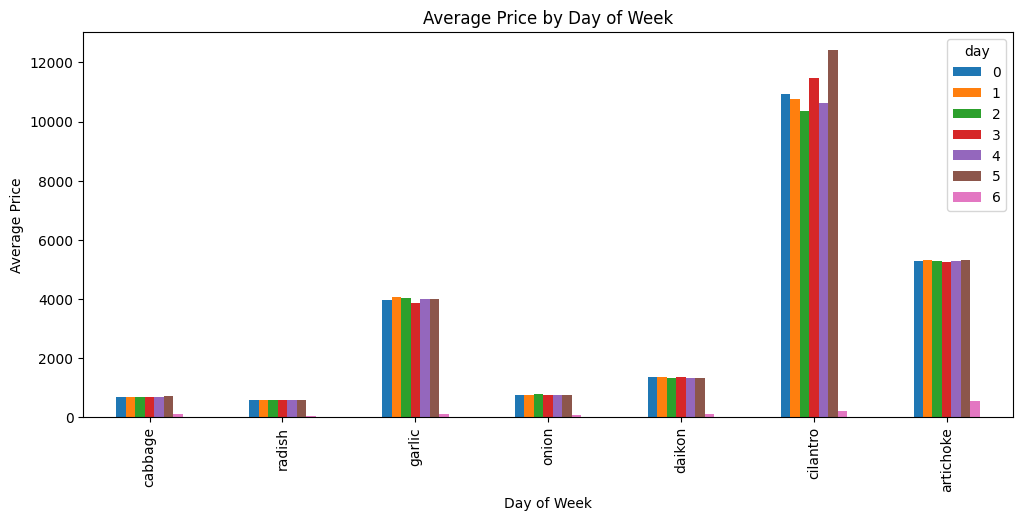

In [ ]:
price_by_day.T.plot(kind='bar', figsize=(12, 5))
plt.title('Average Price by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Average Price')

Text(0, 0.5, 'Average Price')

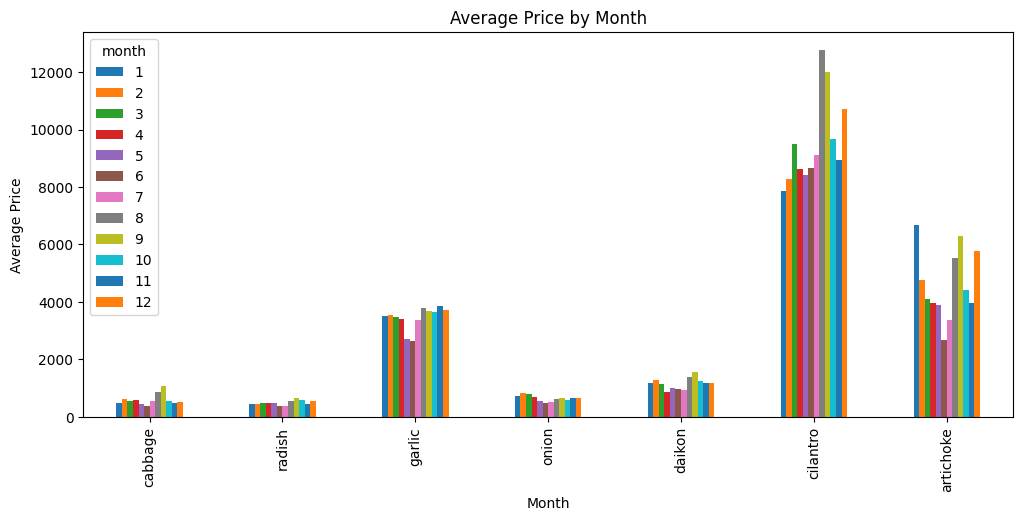

In [ ]:
price_by_month.T.plot(kind='bar', figsize=(12, 5))
plt.title('Average Price by Month')
plt.xlabel('Month')
plt.ylabel('Average Price')

In [ ]:
#품목별 가격의 상관관계
cor_matrix = test_data.corr()[1:].drop("date", axis=1)
cor_matrix.style.background_gradient(cmap='Blues')

,cabbage,radish,garlic,onion,daikon,cilantro,artichoke
cabbage,1.000000,0.895434,0.694913,0.626065,0.621212,0.530906,0.635896
radish,0.895434,1.000000,0.716611,0.661243,0.854574,0.583846,0.760584
garlic,0.694913,0.716611,1.000000,0.983797,0.782372,0.913256,0.798740
onion,0.626065,0.661243,0.983797,1.000000,0.770772,0.918222,0.764154
daikon,0.621212,0.854574,0.782372,0.770772,1.000000,0.685111,0.845459
cilantro,0.530906,0.583846,0.913256,0.918222,0.685111,1.000000,0.786033
artichoke,0.635896,0.760584,0.798740,0.764154,0.845459,0.786033,1.000000


- EDA Note
- 상관관계가 높은 품목의 Pair
    - 배추 & 무
    - 무 & 대파
    - 마늘 & 건고추
    - 양파 & 건고추
- 상관관계가 낮은 품목의 Pair
    - 건고추 & 배추
    - 건고추 & 무


## 베이스라인 모델 구축
- 시계열 예측모델과 ML 기반 모델을 구축
- Feature의 중요도와 예측 성능을 확인
- 모델링 과정은 다양한 피처 엔지니어링과 모델 알고리즘을 반복적으로 적용하고 실험함으로써 베스트 모델을 개발하는 과정을 반복

#### 예측방법론 개요
- 크게 시계열 알고리즘 과 ML 알고리즘으로 구분한다.
- **시계열 알고리즘**
  - 자기상관 \( y \) 값을 활용하여 과거 \( (t-1..t-n) \) 패턴을 학습하여 미래를 예측한다.
  - 대표적인 알고리즘으로 **Prophet**, **ARIMA**, **Exponential Smoothing** 등이 있으며, 저는 **Prophet**을 활용하여 시계열 예측모델을 구축할 예정입니다.

- **M/L 알고리즘**
  - Feature Engineering을 통해 모델 학습 및 예측을 수행한다.
  - 대표적인 알고리즘으로 **Linear Regression**, **Ridge**, **Lasso**, 그리고 Tree-based 모델들인 **Random Forest**, **LGBM**, **XGBOOST**, **MLP** 등이 있다.

 ### Prophet
  - 페이스북에서 개발한 시계열 기반 예측 알고리즘
  - 시계열 예측모델 중에 정확도가 높은 편으로 유명하고 다양한 파라메터를 제공
  - 참고: [https://hyperconnect.github.io/2020/03/09/prophet-package.html](https://hyperconnect.github.io/2020/03/09/prophet-package.html)


In [ ]:
#!pip install prophet

In [ ]:
import logging
import warnings
warnings.filterwarnings('ignore')

from prophet import Prophet
logging.getLogger('prophet').setLevel(logging.WARNING)

In [ ]:
# 훈련 데이터셋 생성
train_data = load_data_set(train_file_path, target_prd, kor_to_eng)

#검증 데이터셋 생성
test_data = load_data_set(test_file_path, target_prd, kor_to_eng)

Data loaded successfully
        date  cabbage  radish  garlic   onion  daikon  cilantro  artichoke
0 2016-01-01      0.0     0.0     0.0     0.0     0.0       0.0        0.0
1 2016-01-02    329.0   360.0  5475.0  1281.0  1704.0   11000.0    13242.0
2 2016-01-03      0.0     0.0     0.0     0.0     0.0       0.0        0.0
3 2016-01-04    478.0   382.0  5210.0  1235.0  1716.0    4464.0     9923.0
4 2016-01-05    442.0   422.0  5387.0  1213.0  1715.0    4342.0     9529.0
Data loaded successfully
        date  cabbage  radish  garlic  onion  daikon  cilantro  artichoke
0 2020-09-29   1787.0  1190.0  5404.0  966.0  2682.0   25873.0    11298.0
1 2020-09-30   1551.0   984.0  5575.0  857.0  2774.0    9929.0     6476.0
2 2020-10-01      0.0     0.0     0.0    0.0     0.0       0.0        0.0
3 2020-10-02      0.0     0.0     0.0    0.0     0.0       0.0        0.0
4 2020-10-03      0.0   835.0     0.0    0.0  3784.0       0.0     5091.0


In [ ]:
# 예측 대상 df 생성
start_dt = '2020-09-29'
end_dt = '2020-11-04'
forecast_df = pd.DataFrame({'date': pd.date_range(start=start_dt, end=end_dt)})

# forecast_df

In [ ]:
import holidays

# 한국 공휴일 데이터를 생성
kr_holidays = holidays.KR(years=[2016, 2017, 2018, 2019, 2020])
holidays_df = pd.DataFrame(list(kr_holidays.items()), columns=['ds', 'holiday'])
holidays_df['lower_window'] = 0
holidays_df['upper_window'] = 1

# Display holidays_df
holidays_df

,ds,holiday,lower_window,upper_window
0,2016-01-01,New Year's Day,0,1
1,2016-02-08,Korean New Year,0,1
2,2016-02-07,The day preceding Korean New Year,0,1
3,2016-02-09,The second day of Korean New Year,0,1
4,2016-03-01,Independence Movement Day,0,1
...,...,...,...,...
83,2020-10-02,The second day of Chuseok,0,1
84,2020-12-25,Christmas Day,0,1
85,2020-04-15,National Assembly Election Day,0,1
86,2020-01-27,Alternative holiday for Korean New Year,0,1


In [ ]:
# 예측 대상 df 생성
start_dt = '2020-09-29' # 예측시작일
end_dt = '2020-11-04' #예측마지막일

forecast_df = pd.DataFrame({'date': pd.date_range(start=start_dt, end=end_dt)})
forecast_df.head()

,date
0,2020-09-29
1,2020-09-30
2,2020-10-01
3,2020-10-02
4,2020-10-03


In [ ]:
# 품목별 반복하면서 예측후 저장
for col in train_data.columns:
    if col != 'date':
        train_prophet = train_data[['date', col]].rename(columns={'date': 'ds', col: 'y'})

        model_prophet = Prophet(holidays=holidays_df)
        model_prophet.fit(train_prophet)

        future_dates = pd.DataFrame(pd.date_range(start=start_dt, end=end_dt), columns=['ds'])
        forecast = model_prophet.predict(future_dates)
        forecast = forecast.round(2)
        forecast_df[col + '_pred'] = forecast['yhat']

DEBUG:cmdstanpy:input tempfile: /tmp/tmp83a0lyy8/pexdq0fw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp83a0lyy8/i3e16wkz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=72493', 'data', 'file=/tmp/tmp83a0lyy8/pexdq0fw.json', 'init=/tmp/tmp83a0lyy8/i3e16wkz.json', 'output', 'file=/tmp/tmp83a0lyy8/prophet_modelza3b48zm/prophet_model-20250801042320.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:23:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:23:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp83a0lyy8/np3s6ttu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp83a0lyy8/bdi13ist.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

In [ ]:
forecast_df.head()

,date,cabbage_pred,radish_pred,garlic_pred,onion_pred,daikon_pred,cilantro_pred,artichoke_pred
0,2020-09-29,1478.61,828.77,4709.09,1021.64,1953.22,17436.86,8106.61
1,2020-09-30,1686.31,1007.64,5069.04,1235.51,2306.33,9096.02,7859.16
2,2020-10-01,274.87,76.14,232.58,330.21,55.03,4456.61,624.45
3,2020-10-02,305.09,89.73,272.15,245.51,120.32,3878.44,1043.18
4,2020-10-03,1553.56,918.77,5062.94,1018.12,2381.20,15509.56,4268.81


In [ ]:
forecast_df.tail()

,date,cabbage_pred,radish_pred,garlic_pred,onion_pred,daikon_pred,cilantro_pred,artichoke_pred
32,2020-10-31,956.00,628.40,4807.08,1017.85,1563.27,18362.53,6693.37
33,2020-11-01,356.17,113.05,898.29,321.51,341.96,6129.51,1866.72
34,2020-11-02,944.33,630.70,4781.40,1025.30,1624.77,16709.85,6600.25
35,2020-11-03,954.39,634.44,4896.90,1031.08,1624.08,16574.10,6612.21
36,2020-11-04,973.51,630.31,4924.14,1043.84,1607.20,16098.79,6591.89


In [ ]:
#실제값과 조인
test = test_data.merge(forecast_df, on=['date'], how='left')
test.head()

,date,cabbage,radish,garlic,onion,daikon,cilantro,artichoke,cabbage_pred,radish_pred,garlic_pred,onion_pred,daikon_pred,cilantro_pred,artichoke_pred
0,2020-09-29,1787.0,1190.0,5404.0,966.0,2682.0,25873.0,11298.0,1478.61,828.77,4709.09,1021.64,1953.22,17436.86,8106.61
1,2020-09-30,1551.0,984.0,5575.0,857.0,2774.0,9929.0,6476.0,1686.31,1007.64,5069.04,1235.51,2306.33,9096.02,7859.16
2,2020-10-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,274.87,76.14,232.58,330.21,55.03,4456.61,624.45
3,2020-10-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,305.09,89.73,272.15,245.51,120.32,3878.44,1043.18
4,2020-10-03,0.0,835.0,0.0,0.0,3784.0,0.0,5091.0,1553.56,918.77,5062.94,1018.12,2381.20,15509.56,4268.81


In [ ]:
# 품목별로 실제, 예측값만 저장
prd = ['cabbage', 'radish', 'garlic', 'onion', 'daikon', 'cilantro', 'artichoke']
dfs = {}
for p in prd:
    dfs[p] = test[['date', p, p+'_pred']]

In [ ]:
print("Dataframe for galic:")
print(dfs['garlic'].head())

Dataframe for galic:
        date  garlic  garlic_pred
0 2020-09-29  5404.0      4709.09
1 2020-09-30  5575.0      5069.04
2 2020-10-01     0.0       232.58
3 2020-10-02     0.0       272.15
4 2020-10-03     0.0      5062.94


In [ ]:
print("Dataframe for cabbage:")
print(dfs['cabbage'].head())

Dataframe for cabbage:
        date  cabbage  cabbage_pred
0 2020-09-29   1787.0       1478.61
1 2020-09-30   1551.0       1686.31
2 2020-10-01      0.0        274.87
3 2020-10-02      0.0        305.09
4 2020-10-03      0.0       1553.56


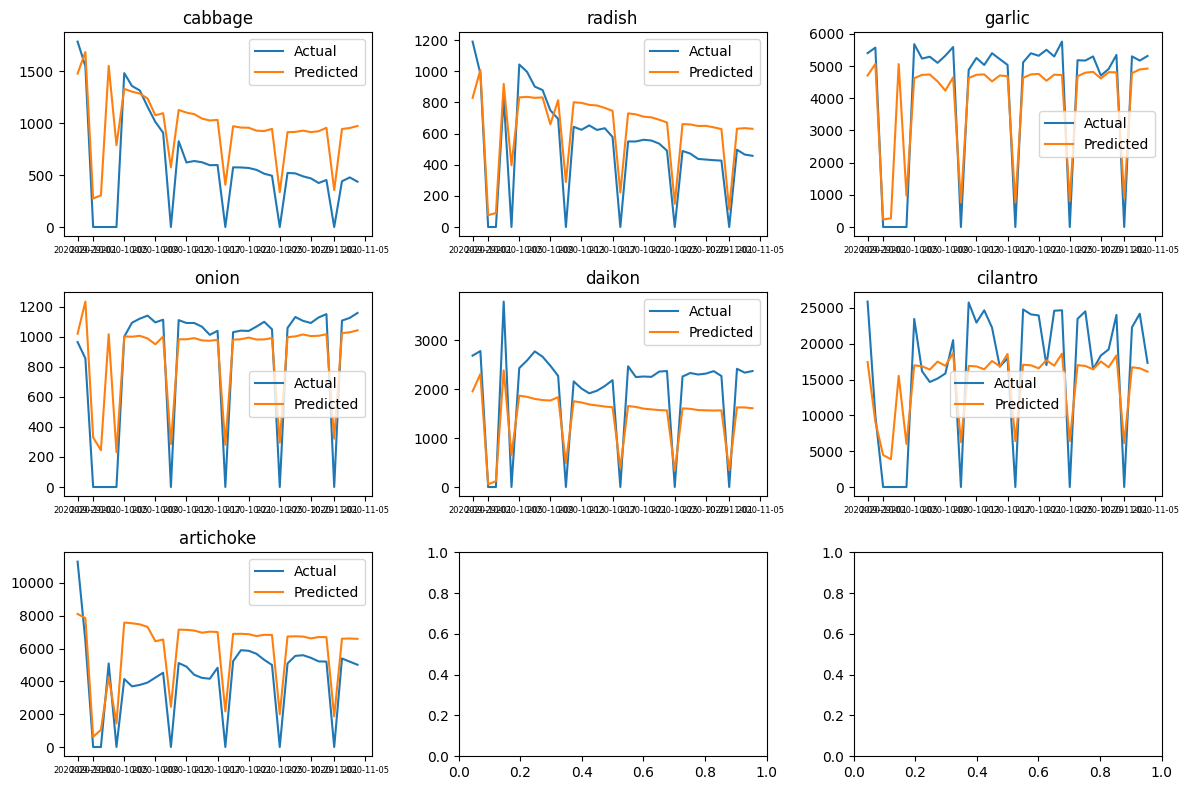

In [ ]:
# 품목별 예측값 vs 실제값 시각화
num_rows = 3
num_cols = 3
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 8))
axes = axes.flatten()

# 품목 목록
products = ['cabbage', 'radish', 'garlic', 'onion', 'daikon', 'cilantro', 'artichoke']

for i, (prd, ax) in enumerate(zip(products, axes)):
    df = dfs[prd]
    ax.plot(df['date'], df[prd], label='Actual')
    ax.plot(df['date'], df[prd + '_pred'], label='Predicted')
    ax.set_title(prd)
    ax.legend()
    ax.tick_params(axis='x', labelsize=6)

plt.tight_layout()
plt.show()

- Note
- 성능지표 선정: MdAPE (Median Absoulte Percentage Error)
- 실제값 대비 절대값 오차의 비율로 오차율을 구한후 1에서 빼서 정확도를 표현
- 0~1 사이의 값을 가지므로 스케일에 영향받지 않아 비교가 용이
- 단 실제값이 너무 작을 경우(분모) 수치 변동성이 큼

In [ ]:
prd = ['cabbage', 'radish', 'garlic', 'onion', 'daikon', 'cilantro', 'artichoke']
dfs = {}
for p in prd:
    dfs[p] = test[['date', p, p + '_pred']]
    dfs[p]['gap'] = dfs[p][p] - dfs[p][p + '_pred']
    dfs[p]['abs_gap'] = abs(dfs[p][p] - dfs[p][p + '_pred'])
    dfs[p]['ape'] = dfs[p]['abs_gap'] / dfs[p][p]
    dfs[p]['ape_median'] = 1 - dfs[p]['ape'].median()

In [ ]:
for p in prd:
    print(f"{p}: APE Median = {dfs[p]['ape_median'][0]}")

cabbage: APE Median = 0.22713826366559486
radish: APE Median = 0.6964453781512605
garlic: APE Median = 0.8940248027057497
onion: APE Median = 0.8998620689655171
daikon: APE Median = 0.6855865921787709
cilantro: APE Median = 0.7249942462600691
artichoke: APE Median = 0.6019741985926506


In [ ]:
# postprocessing
# 비즈니스 로직이나 패턴 등을 이해하여 임의의 예측 값으로 변형: 일요일은 0으로 예측값을 일괄 적용
price_by_day

,cabbage,radish,garlic,onion,daikon,cilantro,artichoke
day,,,,,,,
0,683.44,561.35,3946.44,755.19,1365.35,10929.59,5291.88
1,672.60,568.67,4052.69,752.32,1360.32,10774.06,5313.30
2,686.67,561.73,4043.98,761.73,1330.97,10342.55,5284.68
3,671.24,575.26,3872.85,753.13,1336.74,11484.06,5259.10
4,668.19,563.08,4008.91,742.42,1311.27,10633.57,5291.32
5,699.12,558.24,4009.06,750.63,1321.08,12412.71,5324.81
6,99.55,47.78,107.33,55.50,102.17,203.03,541.68


In [ ]:
test.head()

,date,cabbage,radish,garlic,onion,daikon,cilantro,artichoke,cabbage_pred,radish_pred,garlic_pred,onion_pred,daikon_pred,cilantro_pred,artichoke_pred
0,2020-09-29,1787.0,1190.0,5404.0,966.0,2682.0,25873.0,11298.0,1478.61,828.77,4709.09,1021.64,1953.22,17436.86,8106.61
1,2020-09-30,1551.0,984.0,5575.0,857.0,2774.0,9929.0,6476.0,1686.31,1007.64,5069.04,1235.51,2306.33,9096.02,7859.16
2,2020-10-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,274.87,76.14,232.58,330.21,55.03,4456.61,624.45
3,2020-10-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,305.09,89.73,272.15,245.51,120.32,3878.44,1043.18
4,2020-10-03,0.0,835.0,0.0,0.0,3784.0,0.0,5091.0,1553.56,918.77,5062.94,1018.12,2381.20,15509.56,4268.81


In [ ]:
test_post = test.copy()

# 요일
test_post['day'] = test_post['date'].dt.day_of_week

# 공휴일 지정
holidays = ['2020-10-01', '2020-10-03']
test_post['holiday'] = test_post['date'].isin(holidays).astype(int)

# 일요일이거나 공휴일인 경우 1 아니면 0
test_post['is_flag'] = np.where((test_post['day'] == 6) | (test_post['holiday'] == 1), 1, 0)

In [ ]:
# 공휴일이거나 일요일인 경우 예측값을 0으로 치환
# 휴일은 거래 자체가 closed 가능성 높음. 결국 사람이 거래를 하는데 휴일에는 휴식 필요.
for p in prd:
    test_post[p + '_pred'] = np.where(test_post['is_flag'] == 0, test_post[p + '_pred'], 0)

test_post.head(7)

,date,cabbage,radish,garlic,onion,daikon,cilantro,artichoke,cabbage_pred,radish_pred,garlic_pred,onion_pred,daikon_pred,cilantro_pred,artichoke_pred,day,holiday,is_flag
0,2020-09-29,1787.0,1190.0,5404.0,966.0,2682.0,25873.0,11298.0,1478.61,828.77,4709.09,1021.64,1953.22,17436.86,8106.61,1,0,0
1,2020-09-30,1551.0,984.0,5575.0,857.0,2774.0,9929.0,6476.0,1686.31,1007.64,5069.04,1235.51,2306.33,9096.02,7859.16,2,0,0
2,2020-10-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3,1,1
3,2020-10-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,305.09,89.73,272.15,245.51,120.32,3878.44,1043.18,4,0,0
4,2020-10-03,0.0,835.0,0.0,0.0,3784.0,0.0,5091.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5,1,1
5,2020-10-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,6,0,1
6,2020-10-05,1483.0,1043.0,5683.0,1002.0,2427.0,23450.0,4142.0,1331.09,832.01,4624.78,1002.93,1865.03,16980.70,7581.39,0,0,0


In [ ]:
prd = ['cabbage', 'radish', 'garlic', 'onion', 'daikon', 'cilantro', 'artichoke']

dfs_post = {}
for p in prd:
    dfs_post[p] = test_post[['date', p, p + '_pred']]

print("Dataframe for galic:")
print(dfs_post['garlic'].head(10))

Dataframe for galic:
        date  garlic  garlic_pred
0 2020-09-29  5404.0      4709.09
1 2020-09-30  5575.0      5069.04
2 2020-10-01     0.0         0.00
3 2020-10-02     0.0       272.15
4 2020-10-03     0.0         0.00
5 2020-10-04     0.0         0.00
6 2020-10-05  5683.0      4624.78
7 2020-10-06  5235.0      4726.63
8 2020-10-07  5292.0      4740.11
9 2020-10-08  5102.0      4523.04


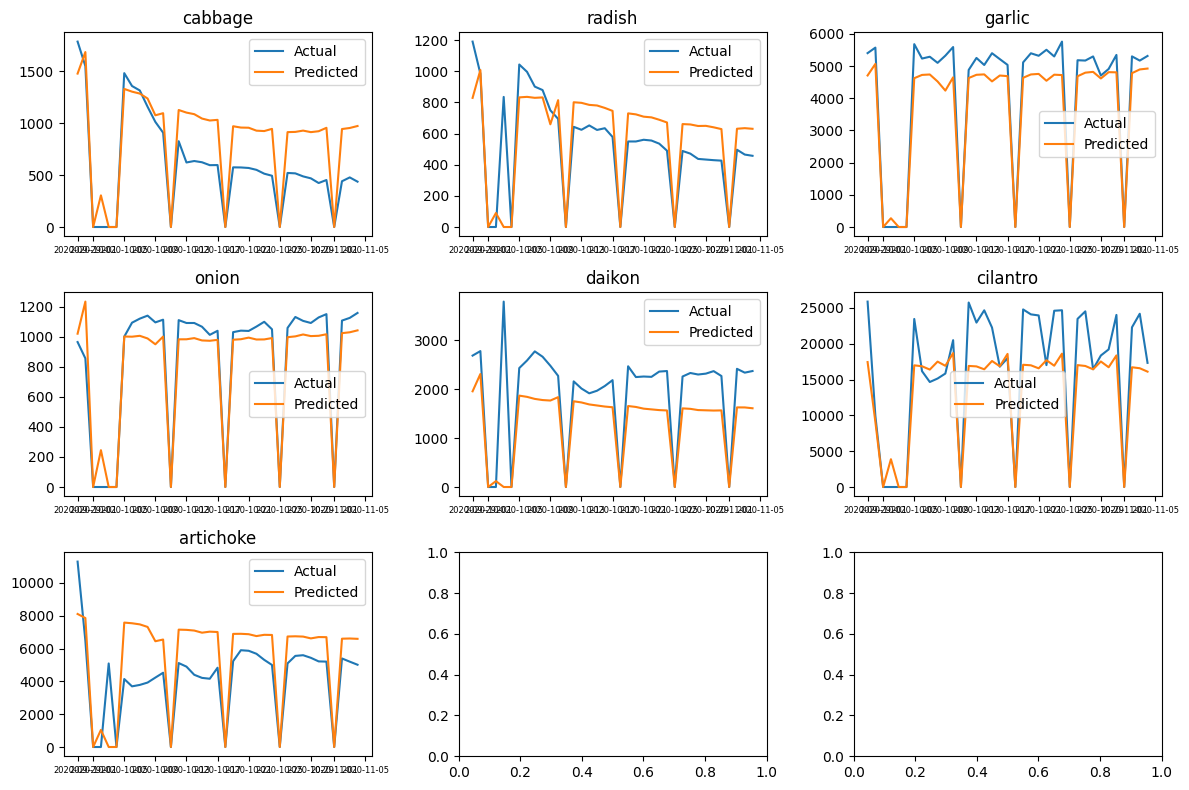

In [ ]:
# 품목별 예측값 vs 실제값 시각화
num_rows = 3
num_cols = 3
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 8))
axes = axes.flatten()

# 품목 목록
products = ['cabbage', 'radish', 'garlic', 'onion', 'daikon', 'cilantro', 'artichoke']

for i, (prd, ax) in enumerate(zip(products, axes)):
    df = dfs_post[prd]
    ax.plot(df['date'], df[prd], label='Actual')
    ax.plot(df['date'], df[prd + '_pred'], label='Predicted')
    ax.set_title(prd)
    ax.legend()
    ax.tick_params(axis='x', labelsize=6)

plt.tight_layout()
plt.show()

In [ ]:
prd = ['cabbage', 'radish', 'garlic', 'onion', 'daikon', 'cilantro', 'artichoke']

for p in prd:
    dfs_post[p]['gap'] = (dfs_post[p][p] - dfs_post[p][p + '_pred'])
    dfs_post[p]['abs_gap'] = abs(dfs_post[p][p] - dfs_post[p][p + '_pred'])
    dfs_post[p]['ape'] = dfs_post[p]['abs_gap'] / dfs_post[p][p]
    dfs_post[p]['ape_median'] = 1 - (dfs_post[p]['ape'].median())

In [ ]:
# with proprocessing
for p in prd:
    print(f"{p}: APE Median = {dfs_post[p]['ape_median'][0]}")

cabbage: APE Median = 0.2837211915917437
radish: APE Median = 0.7132149532710281
garlic: APE Median = 0.9010030083308562
onion: APE Median = 0.9146447975988918
daikon: APE Median = 0.7047686832740213
cilantro: APE Median = 0.7596517062278811
artichoke: APE Median = 0.6787009419152277


In [ ]:
# without post-processing
for p in prd:
    print(f"{p}: APE Median = {dfs[p]['ape_median'][0]}")

cabbage: APE Median = 0.22713826366559486
radish: APE Median = 0.6964453781512605
garlic: APE Median = 0.8940248027057497
onion: APE Median = 0.8998620689655171
daikon: APE Median = 0.6855865921787709
cilantro: APE Median = 0.7249942462600691
artichoke: APE Median = 0.6019741985926506


- Note
- Prophet 알고리즘을 이용한 성능 확인 완료
- Post-processing은 효과가 있으므로 필수적으로 진행 필요

### Feature Engineering for ML


In [ ]:
# 훈련 데이터셋 생성
train_data = load_data_set(train_file_path, target_prd, kor_to_eng)

#검증 데이터셋 생성
test_data = load_data_set(test_file_path, target_prd, kor_to_eng)

Data loaded successfully
        date  cabbage  radish  garlic   onion  daikon  cilantro  artichoke
0 2016-01-01      0.0     0.0     0.0     0.0     0.0       0.0        0.0
1 2016-01-02    329.0   360.0  5475.0  1281.0  1704.0   11000.0    13242.0
2 2016-01-03      0.0     0.0     0.0     0.0     0.0       0.0        0.0
3 2016-01-04    478.0   382.0  5210.0  1235.0  1716.0    4464.0     9923.0
4 2016-01-05    442.0   422.0  5387.0  1213.0  1715.0    4342.0     9529.0
Data loaded successfully
        date  cabbage  radish  garlic  onion  daikon  cilantro  artichoke
0 2020-09-29   1787.0  1190.0  5404.0  966.0  2682.0   25873.0    11298.0
1 2020-09-30   1551.0   984.0  5575.0  857.0  2774.0    9929.0     6476.0
2 2020-10-01      0.0     0.0     0.0    0.0     0.0       0.0        0.0
3 2020-10-02      0.0     0.0     0.0    0.0     0.0       0.0        0.0
4 2020-10-03      0.0   835.0     0.0    0.0  3784.0       0.0     5091.0


In [ ]:
# 편의를 위해 학습 + 테스트셋 합치기
data = pd.concat([train_data, test_data]).reset_index(drop=True)

print(data.head())
print(data.tail())

        date  cabbage  radish  garlic   onion  daikon  cilantro  artichoke
0 2016-01-01      0.0     0.0     0.0     0.0     0.0       0.0        0.0
1 2016-01-02    329.0   360.0  5475.0  1281.0  1704.0   11000.0    13242.0
2 2016-01-03      0.0     0.0     0.0     0.0     0.0       0.0        0.0
3 2016-01-04    478.0   382.0  5210.0  1235.0  1716.0    4464.0     9923.0
4 2016-01-05    442.0   422.0  5387.0  1213.0  1715.0    4342.0     9529.0
           date  cabbage  radish  garlic   onion  daikon  cilantro  artichoke
1765 2020-10-31    453.0   426.0  5348.0  1152.0  2265.0   24013.0     5204.0
1766 2020-11-01      0.0     0.0     0.0     0.0     0.0       0.0        0.0
1767 2020-11-02    441.0   496.0  5303.0  1109.0  2412.0   22287.0     5395.0
1768 2020-11-03    478.0   465.0  5172.0  1127.0  2334.0   24178.0     5201.0
1769 2020-11-04    437.0   457.0  5316.0  1160.0  2367.0   17324.0     5013.0


In [ ]:
import holidays

def add_date_features(data):
    """
    dataset 에 날짜 관련된 피처를 생성
    args:
         dataset
    return:
         features dataset
    """
    # 날짜 기반 파생변수 생성
    data['year'] = data['date'].dt.year
    data['month'] = data['date'].dt.month
    data['day'] = data['date'].dt.day
    data['day_of_week'] = data['date'].dt.dayofweek
    data['is_weekend'] = data['day_of_week'].isin([5, 6]).astype(int)

    # 공휴일 변수
    kr_holidays = holidays.KR(years=data['year'].unique())
    data['is_holiday'] = data['date'].isin(kr_holidays).astype(int)

    return data

In [ ]:
data = add_date_features(data)

In [ ]:
data

,date,cabbage,radish,garlic,onion,daikon,cilantro,artichoke,year,month,day,day_of_week,is_weekend,is_holiday
0,2016-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2016,1,1,4,0,1
1,2016-01-02,329.0,360.0,5475.0,1281.0,1704.0,11000.0,13242.0,2016,1,2,5,1,0
2,2016-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2016,1,3,6,1,0
3,2016-01-04,478.0,382.0,5210.0,1235.0,1716.0,4464.0,9923.0,2016,1,4,0,0,0
4,2016-01-05,442.0,422.0,5387.0,1213.0,1715.0,4342.0,9529.0,2016,1,5,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1765,2020-10-31,453.0,426.0,5348.0,1152.0,2265.0,24013.0,5204.0,2020,10,31,5,1,0
1766,2020-11-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020,11,1,6,1,0
1767,2020-11-02,441.0,496.0,5303.0,1109.0,2412.0,22287.0,5395.0,2020,11,2,0,0,0
1768,2020-11-03,478.0,465.0,5172.0,1127.0,2334.0,24178.0,5201.0,2020,11,3,1,0,0


- Note
- 날짜 관련 피처와 더불어 가장 많이 활용되고 강력한 피처는 자기상관값입니다.
- 마치 Prophet 과 같은 시계열 모델이 자기상관y 값을 가지고 모델링하듯이
- 이를 ML 모델의 Feature로 넣어주어 학습시키는 방법이며 효과가 좋습니다.

In [ ]:
def add_lagging_features(data, window=7):
    """
    예측값의 과거 t-1, .. t-n 까지의 데이터를 추가
    Args:
        data (pd.DataFrame): 제품 가격이 포함된 입력 데이터셋.
        window (int, optional): 이전 시간 스텝을 이동할 개수. 기본값은 7.

    Returns:
        pd.DataFrame: 추가된 지연(lag) 피처를 포함한 새로운 데이터셋.
    """
    data = data.copy()
    products = ['cabbage', 'radish', 'garlic', 'onion', 'daikon', 'cilantro', 'artichoke']

    for product in products:
        data[f'{product}_lag_{window}'] = data[product].shift(window)

    return data

In [ ]:
data = add_lagging_features(data, window=7)
data = add_lagging_features(data, window=14)

In [ ]:
data.head()

,date,cabbage,radish,garlic,onion,daikon,cilantro,artichoke,year,month,...,daikon_lag_7,cilantro_lag_7,artichoke_lag_7,cabbage_lag_14,radish_lag_14,garlic_lag_14,onion_lag_14,daikon_lag_14,cilantro_lag_14,artichoke_lag_14
0,2016-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2016,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2016-01-02,329.0,360.0,5475.0,1281.0,1704.0,11000.0,13242.0,2016,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2016-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2016,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2016-01-04,478.0,382.0,5210.0,1235.0,1716.0,4464.0,9923.0,2016,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2016-01-05,442.0,422.0,5387.0,1213.0,1715.0,4342.0,9529.0,2016,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
def add_rolling_mean(data, window=7):
    """
    변동성이 큰 가격을 갖는 품목에 대한 rolling mean 계산
    Args:
        data (pd.DataFrame): 제품 가격이 포함된 입력 데이터셋.
        window (int, optional): 롤링 윈도우 크기. 기본값은 7.

    Returns:
        pd.DataFrame: rolling mean과 rolling standard deviation을 포함한 새로운 데이터셋.
    """
    products = ['cabbage', 'radish', 'garlic', 'onion', 'daikon', 'cilantro', 'artichoke']

    for product in products:
        data[f'{product}_rolling_mean'] = data[product].rolling(window=window).mean()
        data[f'{product}_rolling_std'] = data[product].rolling(window=window).std()

    return data

In [ ]:
data = add_rolling_mean(data)

In [ ]:
data.head()

,date,cabbage,radish,garlic,onion,daikon,cilantro,artichoke,year,month,...,garlic_rolling_mean,garlic_rolling_std,onion_rolling_mean,onion_rolling_std,daikon_rolling_mean,daikon_rolling_std,cilantro_rolling_mean,cilantro_rolling_std,artichoke_rolling_mean,artichoke_rolling_std
0,2016-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2016,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2016-01-02,329.0,360.0,5475.0,1281.0,1704.0,11000.0,13242.0,2016,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2016-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2016,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2016-01-04,478.0,382.0,5210.0,1235.0,1716.0,4464.0,9923.0,2016,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2016-01-05,442.0,422.0,5387.0,1213.0,1715.0,4342.0,9529.0,2016,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
def split_data(data, std_date="2020-09-29"):
    """
    특정 날짜 기준으로 train, test dataset 나누기
    Args:
        data (pd.DataFrame): 입력 데이터셋.
        std_date (str, optional): 기준 날짜. 기본값은 '2020-09-29'.

    Returns:
        tuple: 훈련용(train) 데이터셋과 테스트용(test) 데이터셋.
    """
    data = data.dropna()
    train_data = data.query("date < @std_date")
    test_data = data.query("date >= @std_date")

    print("Train set shape:", train_data.shape)
    print("Test set shape:", test_data.shape)
    return train_data, test_data

In [ ]:
train_data, test_data = split_data(data)

Train set shape: (1719, 42)
Test set shape: (37, 42)


In [ ]:
train_data.tail()

,date,cabbage,radish,garlic,onion,daikon,cilantro,artichoke,year,month,...,garlic_rolling_mean,garlic_rolling_std,onion_rolling_mean,onion_rolling_std,daikon_rolling_mean,daikon_rolling_std,cilantro_rolling_mean,cilantro_rolling_std,artichoke_rolling_mean,artichoke_rolling_std
1728,2020-09-24,1839.0,990.0,4775.0,990.0,2380.0,19101.0,10028.0,2020,9,...,4421.142857,1963.211945,994.857143,34.387152,2140.857143,133.913440,17450.285714,8401.309733,10425.857143,1213.752779
1729,2020-09-25,1789.0,1011.0,5039.0,955.0,2239.0,23095.0,10921.0,2020,9,...,4392.285714,1950.596466,994.000000,35.430684,2166.571429,132.853123,17623.000000,8519.296313,10401.428571,1199.751204
1730,2020-09-26,1760.0,1075.0,5565.0,961.0,2126.0,22510.0,10607.0,2020,9,...,4472.571429,1991.068629,991.857143,37.114366,2178.000000,123.891081,17472.571429,8405.466730,10461.571429,1197.702503
1731,2020-09-27,3066.0,1139.0,5227.0,1056.0,1866.0,22333.0,12195.0,2020,9,...,5219.285714,273.348809,990.142857,33.067752,2127.714286,168.393106,20663.000000,3439.777076,10366.142857,981.590279
1732,2020-09-28,1867.0,1147.0,4757.0,964.0,2614.0,22022.0,11164.0,2020,9,...,5168.714286,324.653002,986.857143,34.541900,2211.428571,240.697498,21842.428571,1609.001125,10630.714286,895.962186


In [ ]:
test_data.head()

,date,cabbage,radish,garlic,onion,daikon,cilantro,artichoke,year,month,...,garlic_rolling_mean,garlic_rolling_std,onion_rolling_mean,onion_rolling_std,daikon_rolling_mean,daikon_rolling_std,cilantro_rolling_mean,cilantro_rolling_std,artichoke_rolling_mean,artichoke_rolling_std
1733,2020-09-29,1787.0,1190.0,5404.0,966.0,2682.0,25873.0,11298.0,2020,9,...,5155.571429,310.760281,982.142857,34.858899,2303.285714,282.917370,22649.000000,2025.475335,10881.428571,778.741904
1734,2020-09-30,1551.0,984.0,5575.0,857.0,2774.0,9929.0,6476.0,2020,9,...,5191.714286,346.051400,964.142857,58.712374,2383.000000,329.070914,20694.714286,5143.887528,10384.142857,1846.655303
1735,2020-10-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020,10,...,4509.571429,2010.038296,822.714286,367.326247,2043.000000,959.097319,17966.000000,9419.550379,8951.571429,4355.046378
1736,2020-10-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020,10,...,3789.714286,2603.526564,686.285714,472.341936,1723.142857,1220.551710,14666.714286,11200.008091,7391.428571,5369.857784
1737,2020-10-03,0.0,835.0,0.0,0.0,3784.0,0.0,5091.0,2020,10,...,2994.714286,2812.360320,549.000000,516.757519,1960.000000,1450.896734,11451.000000,11788.771041,6603.428571,5222.031848


### ML 모델 구축 및 성능 비교

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_percentage_error

In [ ]:
train_data.columns

Index(['date', 'cabbage', 'radish', 'garlic', 'onion', 'daikon', 'cilantro',
       'artichoke', 'year', 'month', 'day', 'day_of_week', 'is_weekend',
       'is_holiday', 'cabbage_lag_7', 'radish_lag_7', 'garlic_lag_7',
       'onion_lag_7', 'daikon_lag_7', 'cilantro_lag_7', 'artichoke_lag_7',
       'cabbage_lag_14', 'radish_lag_14', 'garlic_lag_14', 'onion_lag_14',
       'daikon_lag_14', 'cilantro_lag_14', 'artichoke_lag_14',
       'cabbage_rolling_mean', 'cabbage_rolling_std', 'radish_rolling_mean',
       'radish_rolling_std', 'garlic_rolling_mean', 'garlic_rolling_std',
       'onion_rolling_mean', 'onion_rolling_std', 'daikon_rolling_mean',
       'daikon_rolling_std', 'cilantro_rolling_mean', 'cilantro_rolling_std',
       'artichoke_rolling_mean', 'artichoke_rolling_std'],
      dtype='object')

In [ ]:
# 예측 대상 품목 리스트
products = ['cabbage', 'radish', 'garlic', 'onion', 'daikon', 'cilantro', 'artichoke']

# 피처 정의
features = ['year', 'month', 'day', 'day_of_week', 'is_weekend', 'is_holiday'] + \
           [f'{product}_lag_7' for product in products] + \
           [f'{product}_lag_14' for product in products] + \
           [f'{product}_rolling_mean' for product in products] + \
           [f'{product}_rolling_std' for product in products]

# 타겟 정의
targets = ['cabbage', 'radish', 'garlic', 'onion', 'daikon', 'cilantro', 'artichoke']

In [ ]:
# 모델 선언: 계속해서 다른 모델도 추가 가능
models = {
    'Ridge': Ridge(),
    'RandomForest': RandomForestRegressor(),
    'LGBM': LGBMRegressor(),
    'XGBoost': XGBRegressor(),
    'MLP': MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=500)
}

def train_models(train_data, test_data, targets, features, models):
    """
    학습 데이터셋을 받아서 모델별로 반복하여 학습 진행하고 예측값을 반환하는 함수.
    Args:
        train_data (pd.DataFrame): 학습 데이터셋.
        test_data (pd.DataFrame): 테스트 데이터셋.
        targets (list): 예측하려는 품목 리스트.
        features (list): 학습에 사용할 피처 리스트.
        models (dict): 사용할 모델들의 딕셔너리.

    Returns:
        dict: 각 모델에 대해 예측된 값을 포함한 결과 딕셔너리.
    """
    predictions = {model_name: {} for model_name in models}
    for model_name, model in models.items():
        for target in targets:
            model.fit(train_data[features], train_data[target])
            predictions[model_name][target] = model.predict(test_data[features])
    return predictions

In [ ]:
predictions = train_models(train_data, test_data, targets, features, models)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000615 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7202
[LightGBM] [Info] Number of data points in the train set: 1719, number of used features: 34
[LightGBM] [Info] Start training from score 599.280396
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000281 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7202
[LightGBM] [Info] Number of data points in the train set: 1719, number of used features: 34
[LightGBM] [Info] Start training from score 492.411867
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000305 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

In [ ]:
predictions

{'Ridge': {'cabbage': array([2325.38158538, 2151.05164051, 1778.77710296, 1500.6520821 ,
         1217.60625779,  864.62684014,  987.94693262,  919.54367958,
          757.25002659,  237.41574035,  285.81442274,  931.52858901,
          612.94599123, 1199.99669111, 1160.45230724, 1065.12614832,
          726.46829958,  597.5479715 ,  365.64602412,   16.03703068,
          787.87268489,  677.47971049,  680.08507546,  637.83471589,
          633.83933319,  629.66211594,  -46.1711671 ,  636.28916424,
          630.8813805 ,  611.07546373,  607.20931341,  586.72219841,
          513.72268928,  -71.95563132,  579.20891928,  602.49861479,
          550.39729897]),
  'radish': array([1293.54879044, 1148.61851687,  942.76892162,  816.23411061,
          742.14176535,  686.00701801,  815.68004653,  797.85670549,
          710.34755419,  324.96111694,  278.50307639,  657.7299009 ,
          425.83225779,  946.71325549,  906.02636508,  844.50046274,
          532.4334373 ,  475.21153134,  440.403

In [ ]:
predictions['LGBM']['onion']

array([ 922.65625067,  928.12943346,  660.48043965,  319.57355106,
        188.6157825 ,  339.12872439,  818.37232228,  926.83773449,
        963.75119256,  979.39721962,  817.96252382,  882.36869629,
        -46.64847414,  986.47193495, 1015.96775673, 1078.6758735 ,
       1076.40336887, 1020.40147358,  985.64498685,   41.4053009 ,
        975.5440814 , 1025.99864481,  988.57595541,  995.92394404,
       1024.26654128, 1000.95528986,   10.7452048 , 1004.16684765,
       1008.03082367, 1006.62684908, 1031.08044021, 1068.39688231,
       1096.68229573,   30.86361132, 1100.08155403, 1064.46729874,
       1095.86699604])

In [ ]:
predictions['MLP']['cabbage']

array([2471.47704036, 2388.00627903, 1993.94035869, 1584.88429672,
       1330.26046167, 1160.36788932, 1236.68222598, 1113.67499187,
        962.80723888,  862.81006713,  935.60625522, 1107.59757913,
       1258.90230448, 1225.61682713, 1233.11120848, 1217.04196176,
        389.96331045,  329.67477728,  303.57348347,  -90.42995654,
       1200.87279722,  948.03534637,  940.76757467,  835.31787724,
        806.08205977,  850.59851632, -176.85183879,  969.35185416,
        870.88815706,  903.25772059,  706.84894783,  788.94245606,
        726.36663396, -206.17328284,  791.62351019,  845.30388971,
        580.15553562])

In [ ]:
predictions['XGBoost']['cabbage']

array([ 2.1727041e+03,  1.5227760e+03,  1.7726680e+03,  1.9123832e+03,
        1.6435557e+03,  5.8832520e+02,  9.4400189e+02,  9.3169287e+02,
        9.0751758e+02,  9.2123248e+02,  9.6437390e+02,  7.9531982e+02,
        5.9325382e+01,  1.0504916e+03,  1.0316085e+03,  8.8345563e+02,
        7.8955029e+02,  7.2596436e+02,  6.0510272e+02, -2.7989259e+00,
        3.8578040e+02,  5.8192603e+02,  5.5484406e+02,  6.2720770e+02,
        5.0071356e+02,  5.4602686e+02, -1.4619687e+00,  5.5582465e+02,
        5.1896954e+02,  4.7264169e+02,  4.7082925e+02,  4.2171945e+02,
        4.0791989e+02, -1.7709608e+01,  4.2728339e+02,  4.4647339e+02,
        4.2990155e+02], dtype=float32)

In [ ]:
def create_predictions_df(test_data, predictions, targets):
    """
    테스트셋에 대한 예측값을 데이터프레임으로 생성하는 함수.

    Args:
        test_data (pd.DataFrame): 테스트 데이터셋.
        predictions (dict): 각 모델에서 예측된 값을 포함한 딕셔너리.
        targets (list): 예측하려는 품목 리스트.

    Returns:
        pd.DataFrame: 테스트 데이터셋에 예측값을 추가한 새로운 데이터프레임.
    """
    # 예측값을 데이터프레임으로 변환
    test_data_predictions = test_data.copy()

    for model_name, model_preds in predictions.items():
        for target in targets:
            # 예측값을 'target' 별로 모델명과 함께 컬럼 추가
            test_data_predictions[f'{target}_pred_{model_name}'] = model_preds[target]
    return test_data_predictions

In [ ]:
test_data_predictions = create_predictions_df(test_data, predictions, targets)

In [ ]:
test_data_predictions.tail()

,date,cabbage,radish,garlic,onion,daikon,cilantro,artichoke,year,month,...,daikon_pred_XGBoost,cilantro_pred_XGBoost,artichoke_pred_XGBoost,cabbage_pred_MLP,radish_pred_MLP,garlic_pred_MLP,onion_pred_MLP,daikon_pred_MLP,cilantro_pred_MLP,artichoke_pred_MLP
1765,2020-10-31,453.0,426.0,5348.0,1152.0,2265.0,24013.0,5204.0,2020,10,...,1936.800049,26469.830078,5664.440430,726.366634,368.239808,5494.314185,1023.141703,2204.957447,18389.208810,5170.198842
1766,2020-11-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020,11,...,-8.553579,-828.160706,137.593307,-206.173283,-91.946926,101.079644,146.696602,158.453538,-2033.385743,174.339876
1767,2020-11-02,441.0,496.0,5303.0,1109.0,2412.0,22287.0,5395.0,2020,11,...,2208.924072,21913.974609,5241.469238,791.623510,399.645264,5402.851593,1059.984293,2341.054060,18543.432661,5071.705359
1768,2020-11-03,478.0,465.0,5172.0,1127.0,2334.0,24178.0,5201.0,2020,11,...,2201.283203,19229.408203,5105.583008,845.303890,440.262313,5451.559922,1115.618960,2334.778553,18593.148442,4976.773686
1769,2020-11-04,437.0,457.0,5316.0,1160.0,2367.0,17324.0,5013.0,2020,11,...,2154.225342,20106.990234,5131.424316,580.155536,489.951564,5218.189583,1119.746632,2402.748265,18800.404086,4950.959394


In [ ]:
def evaluate_predictions(test_data_predictions, targets):
    """
    테스트셋에 대한 예측값을 평가하여 MdAPE를 계산하는 함수.

    Args:
        test_data_predictions (pd.DataFrame): 테스트셋과 예측값을 포함한 데이터프레임.
        targets (list): 예측하려는 품목 리스트.

    Returns:
        pd.DataFrame: 각 품목과 모델에 대한 MdAPE 값을 포함하는 데이터프레임.
    """
    MdAPES = {}
    for target in targets:
        for model_name in test_data_predictions.columns:
            if target + '_pred' in model_name:
                # APE 컬럼 생성
                APE_col = f'{target}_APE_{model_name.split("_")[2]}'
                test_data_predictions[APE_col] = np.abs(
                    (test_data_predictions[target] - test_data_predictions[model_name]) / test_data_predictions[target]
                )
                # MdAPE 계산
                MdAPE = test_data_predictions[APE_col].median()
                MdAPES[f'{target}_{model_name.split("_")[2]}'] = 1-round(MdAPE, 6)

    return pd.DataFrame(list(MdAPES.items()), columns=['product_model', 'MdAPE'])


In [ ]:
metrics = evaluate_predictions(test_data_predictions, targets)
metrics[['product', 'model']] = metrics['product_model'].str.split('_', expand=True)

In [ ]:
metrics.head()

,product_model,MdAPE,product,model
0,cabbage_Ridge,0.666181,cabbage,Ridge
1,cabbage_RandomForest,0.889492,cabbage,RandomForest
2,cabbage_LGBM,0.802795,cabbage,LGBM
3,cabbage_XGBoost,0.794851,cabbage,XGBoost
4,cabbage_MLP,0.853777,cabbage,MLP


In [ ]:
def plot_predictions(test_data_predictions, targets, models):

    num_rows = 3  # 그래프의 행 수
    num_cols = 3  # 그래프의 열 수
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 12))
    axes = axes.flatten()  # 2D 배열을 1D로 변환하여 인덱스 사용을 용이하게 함

    for i, target in enumerate(targets):
        ax = axes[i]
        ax.plot(test_data_predictions['date'], test_data_predictions[target], label='Actual')
        for model_name in models.keys():
            ax.plot(test_data_predictions['date'], test_data_predictions[f'{target}_pred_{model_name}'],
                    label=f'Predicted_{model_name}')

        ax.set_title(target)
        ax.legend()
        ax.tick_params(axis='x', labelsize=6)

    plt.tight_layout()
    plt.show()

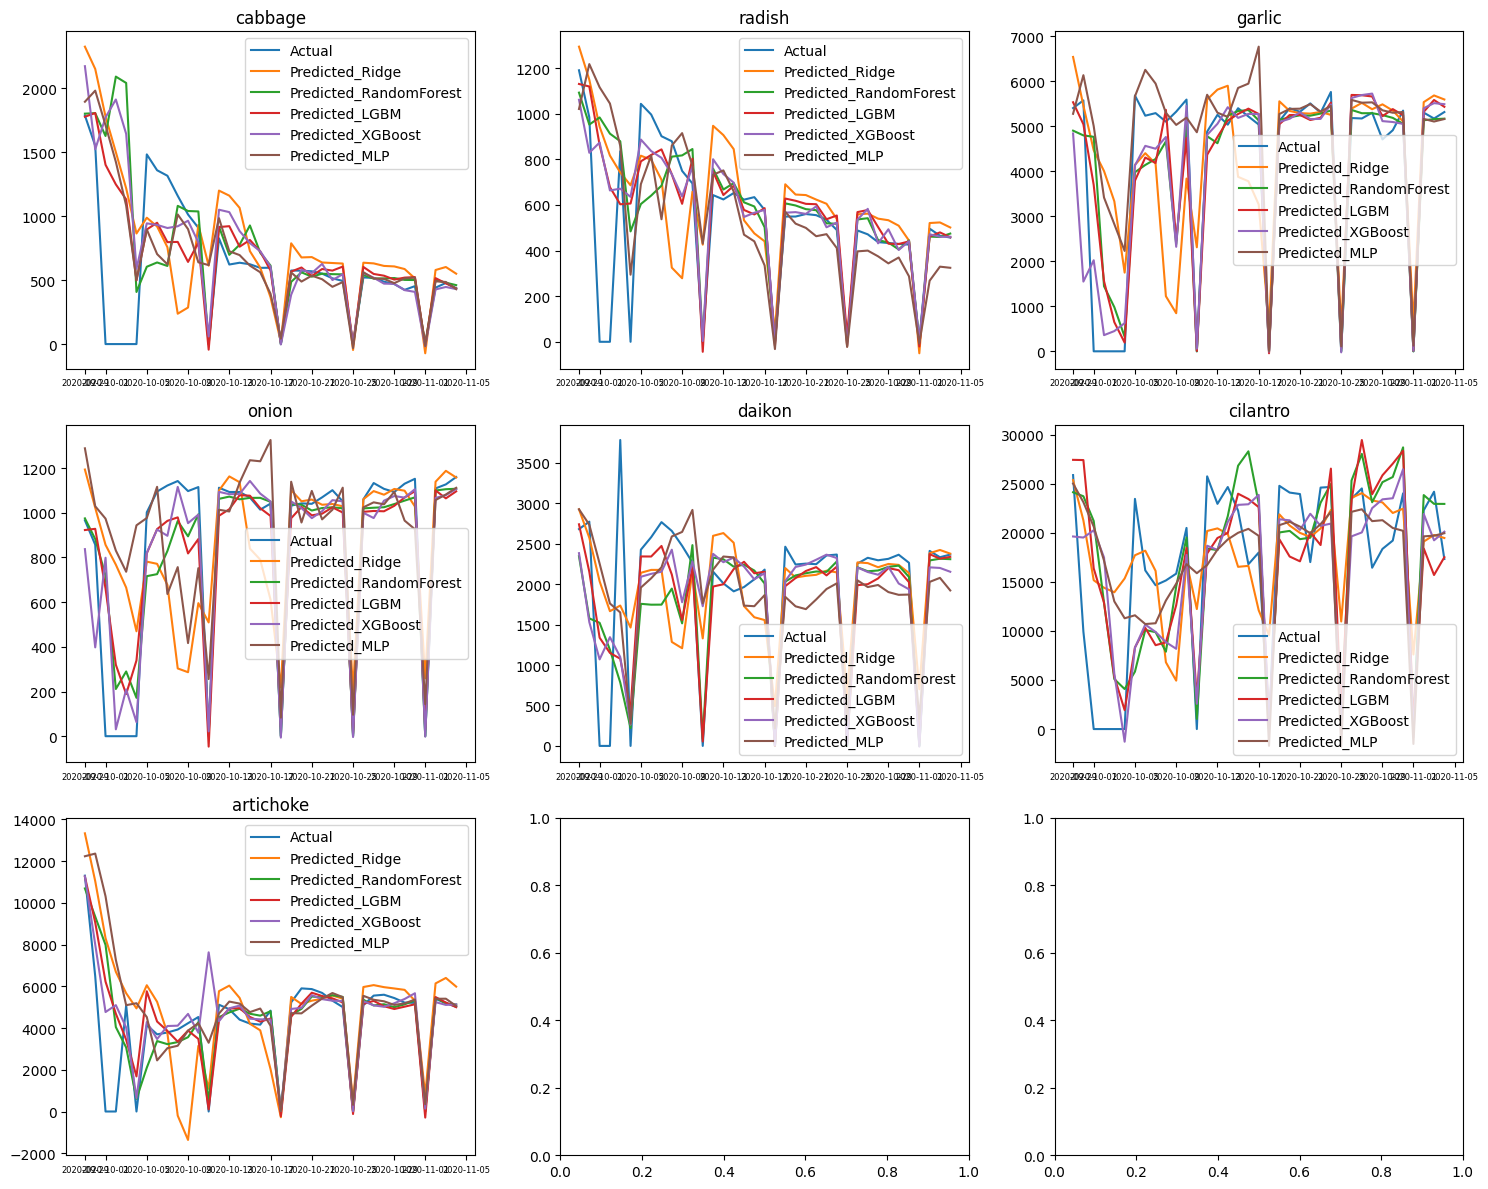

In [ ]:
plot_predictions(test_data_predictions, targets, models)

In [ ]:
def apply_post_processing(test_data, targets):
    """
    post-processing
    args:
        test_data,
        targets
    return:
        test_data
    """
    holidays = ['2020-10-01', '2020-10-03']
    test_data['day'] = test_data['date'].dt.dayofweek
    test_data['holiday'] = test_data['date'].isin(holidays).astype(int)
    test_data['is_flag'] = np.where((test_data['day'] == 6) | (test_data['holiday'] == 1), 1, 0)

    for target in targets:
        for model_name in test_data.columns:
            if target + '_pred_' in model_name:
                test_data[model_name] = np.where(test_data['is_flag'] == 0, test_data[model_name], 0)
    return test_data

In [ ]:
test_data_predictions = create_predictions_df(test_data, predictions, targets)

In [ ]:
test_data_predictions_post = apply_post_processing(test_data_predictions, targets)

In [ ]:
test_data_predictions_post.tail(10)

,date,cabbage,radish,garlic,onion,daikon,cilantro,artichoke,year,month,...,artichoke_pred_XGBoost,cabbage_pred_MLP,radish_pred_MLP,garlic_pred_MLP,onion_pred_MLP,daikon_pred_MLP,cilantro_pred_MLP,artichoke_pred_MLP,holiday,is_flag
1760,2020-10-26,521.0,488.0,5183.0,1060.0,2255.0,23463.0,5096.0,2020,10,...,5286.774902,969.351854,437.930794,5519.366416,1045.338529,2330.149693,21633.388549,5260.251400,0,0
1761,2020-10-27,517.0,471.0,5173.0,1133.0,2327.0,24514.0,5552.0,2020,10,...,5084.600586,870.888157,435.586366,5590.310450,1100.271284,2223.521492,21763.797494,5044.554814,0,0
1762,2020-10-28,488.0,437.0,5301.0,1107.0,2296.0,16436.0,5594.0,2020,10,...,5017.376465,903.257721,453.841934,5540.295404,1063.092415,2282.593029,20684.551584,4958.933901,0,0
1763,2020-10-29,469.0,433.0,4708.0,1093.0,2314.0,18353.0,5435.0,2020,10,...,5184.867676,706.848948,442.723061,5268.683931,1102.164439,2254.033946,20613.023301,5042.025694,0,0
1764,2020-10-30,424.0,429.0,4912.0,1130.0,2365.0,19203.0,5217.0,2020,10,...,5389.917969,788.942456,374.484608,5503.743675,1013.509625,2210.148303,18872.861364,4999.437901,0,0
1765,2020-10-31,453.0,426.0,5348.0,1152.0,2265.0,24013.0,5204.0,2020,10,...,5664.440430,726.366634,368.239808,5494.314185,1023.141703,2204.957447,18389.208810,5170.198842,0,0
1766,2020-11-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020,11,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,1
1767,2020-11-02,441.0,496.0,5303.0,1109.0,2412.0,22287.0,5395.0,2020,11,...,5241.469238,791.623510,399.645264,5402.851593,1059.984293,2341.054060,18543.432661,5071.705359,0,0
1768,2020-11-03,478.0,465.0,5172.0,1127.0,2334.0,24178.0,5201.0,2020,11,...,5105.583008,845.303890,440.262313,5451.559922,1115.618960,2334.778553,18593.148442,4976.773686,0,0
1769,2020-11-04,437.0,457.0,5316.0,1160.0,2367.0,17324.0,5013.0,2020,11,...,5131.424316,580.155536,489.951564,5218.189583,1119.746632,2402.748265,18800.404086,4950.959394,0,0


In [ ]:
metrics_post = evaluate_predictions(test_data_predictions_post, targets)
metrics_post[['product', 'model']] = metrics_post['product_model'].str.split('_', expand=True)

NameError: name 'metric_post' is not defined

In [ ]:
metrics_post.head()

,product_model,MdAPE,product,model
0,cabbage_Ridge,0.702017,cabbage,Ridge
1,cabbage_RandomForest,0.885828,cabbage,RandomForest
2,cabbage_LGBM,0.843261,cabbage,LGBM
3,cabbage_XGBoost,0.897584,cabbage,XGBoost
4,cabbage_MLP,0.751489,cabbage,MLP


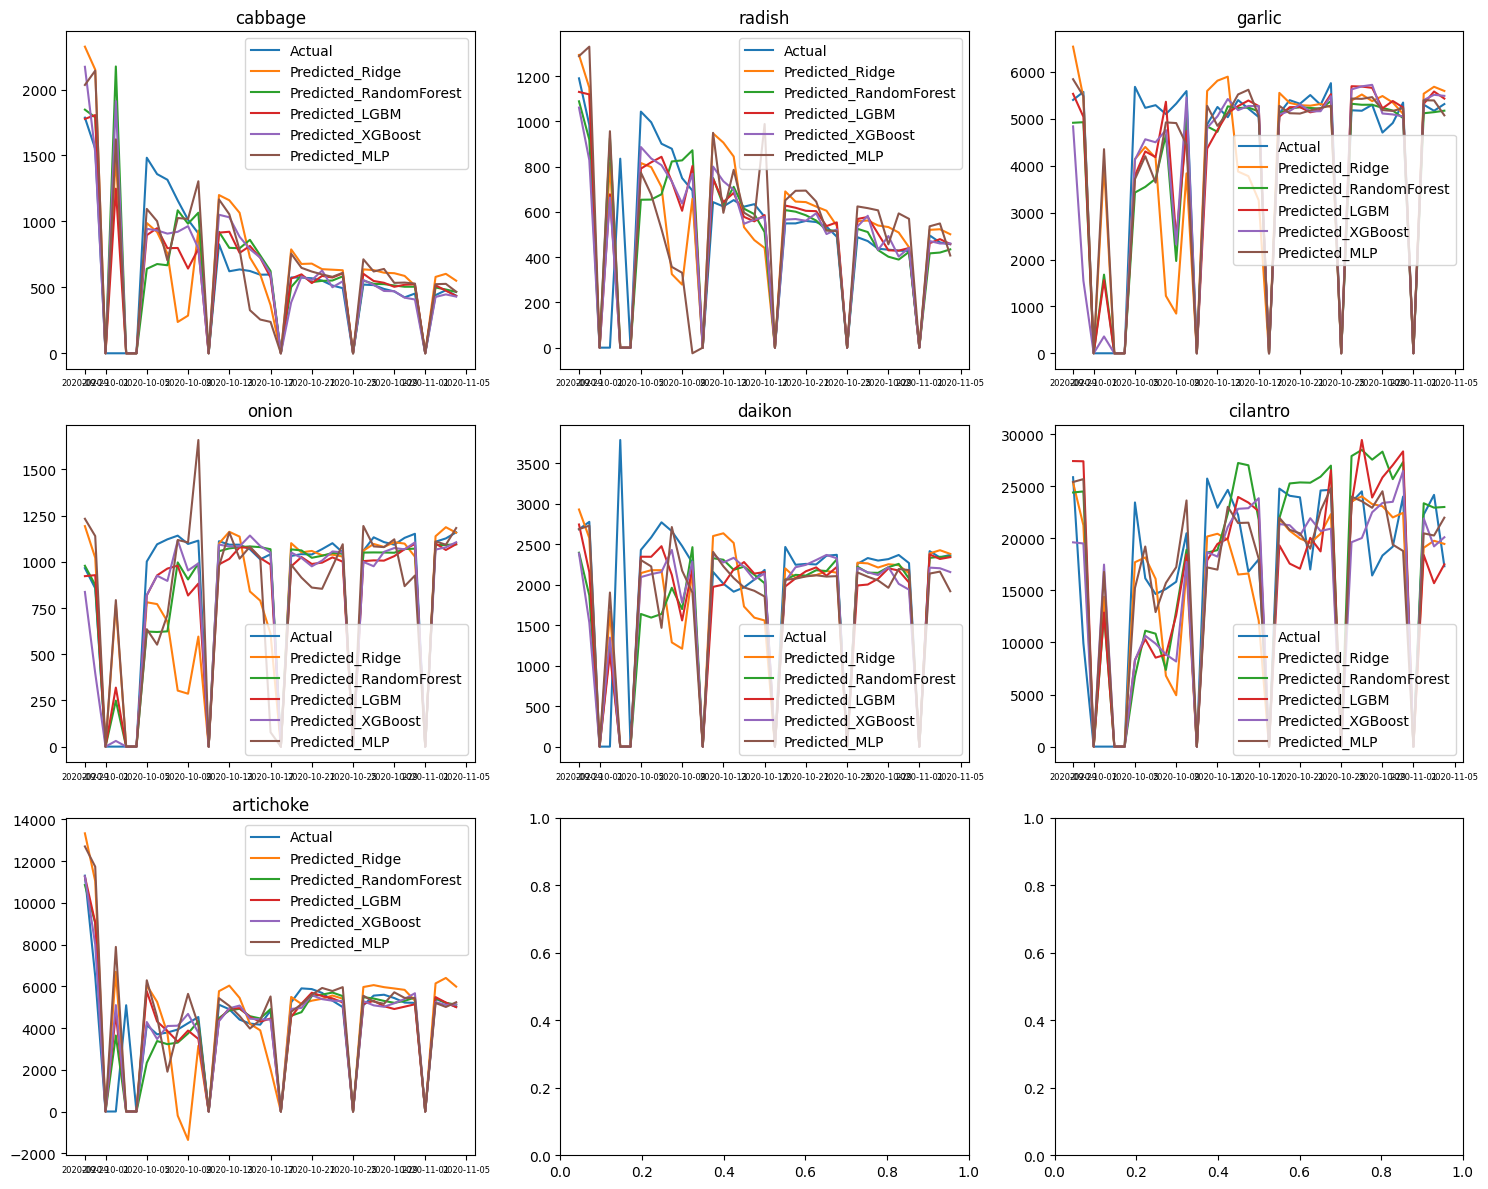

In [ ]:
plot_predictions(test_data_predictions_post, targets, models)

In [ ]:
def plot_mdape_compare(metrics_post):
    products = metrics_post['product'].unique()
    num_products = len(products)

    fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10), sharex=False, sharey=True)

    for i, product in enumerate(products):
        row = i // 3
        col = i % 3
        product_data = metrics_post[metrics_post['product'] == product]

        ax = axes[row, col]

        ax.bar(product_data['model'], product_data['MdAPE'])
        ax.set_title(product)
        ax.set_ylabel('MdAPE')
        ax.tick_params(axis='x', labelrotation=45)

    plt.tight_layout()
    plt.subplots_adjust(top=0.9)
    plt.show()

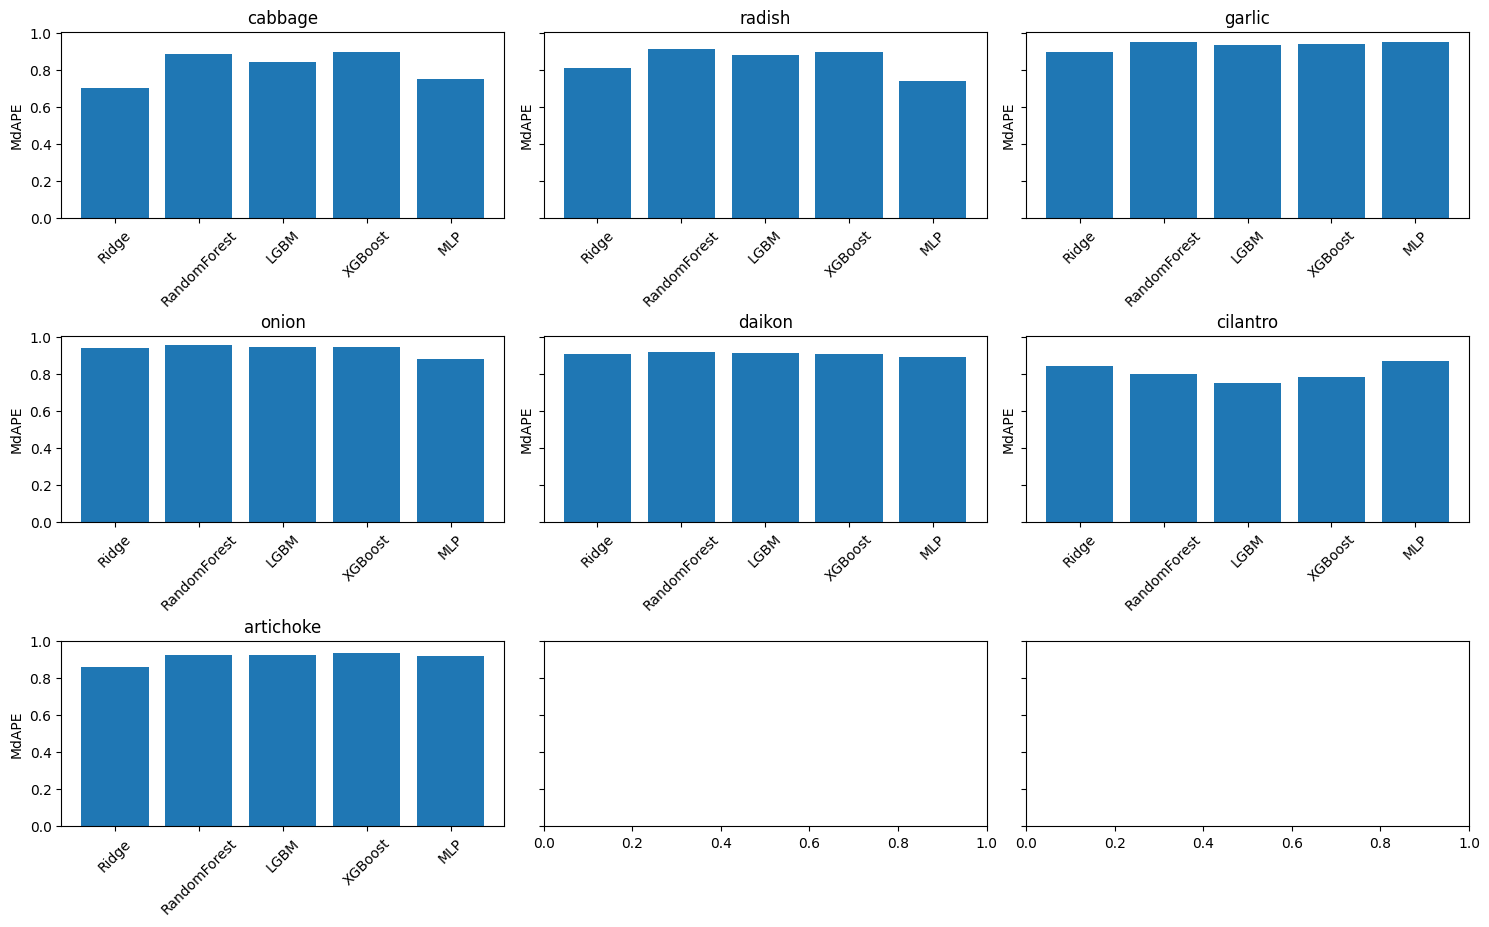

In [ ]:
plot_mdape_compare(metrics_post)

In [ ]:
metrics_post.pivot(index='product', columns='model', values='MdAPE').round(5)

model,LGBM,MLP,RandomForest,Ridge,XGBoost
product,,,,,
artichoke,0.92451,0.92191,0.92698,0.86274,0.93962
cabbage,0.84326,0.75149,0.88583,0.70202,0.89758
cilantro,0.75246,0.87299,0.79996,0.84229,0.78540
daikon,0.91438,0.89323,0.91961,0.90886,0.91011
garlic,0.93251,0.94970,0.95202,0.89710,0.94075
onion,0.94393,0.88144,0.95604,0.94004,0.94856
radish,0.88048,0.73751,0.91467,0.80715,0.89488


In [ ]:
metrics.pivot(index='product', columns='model', values='MdAPE').round(5)

model,LGBM,MLP,RandomForest,Ridge,XGBoost
product,,,,,
artichoke,0.90341,0.91341,0.92059,0.82052,0.91780
cabbage,0.80280,0.68898,0.87101,0.66618,0.79485
cilantro,0.69467,0.83860,0.74024,0.81766,0.72490
daikon,0.89526,0.88894,0.91501,0.88230,0.87119
garlic,0.90485,0.92340,0.94597,0.83455,0.92276
onion,0.92952,0.82792,0.95120,0.80714,0.93836
radish,0.86280,0.69117,0.91467,0.78840,0.89142


### Feature Importance Check

In [ ]:
#!pip install shap

In [ ]:
import shap

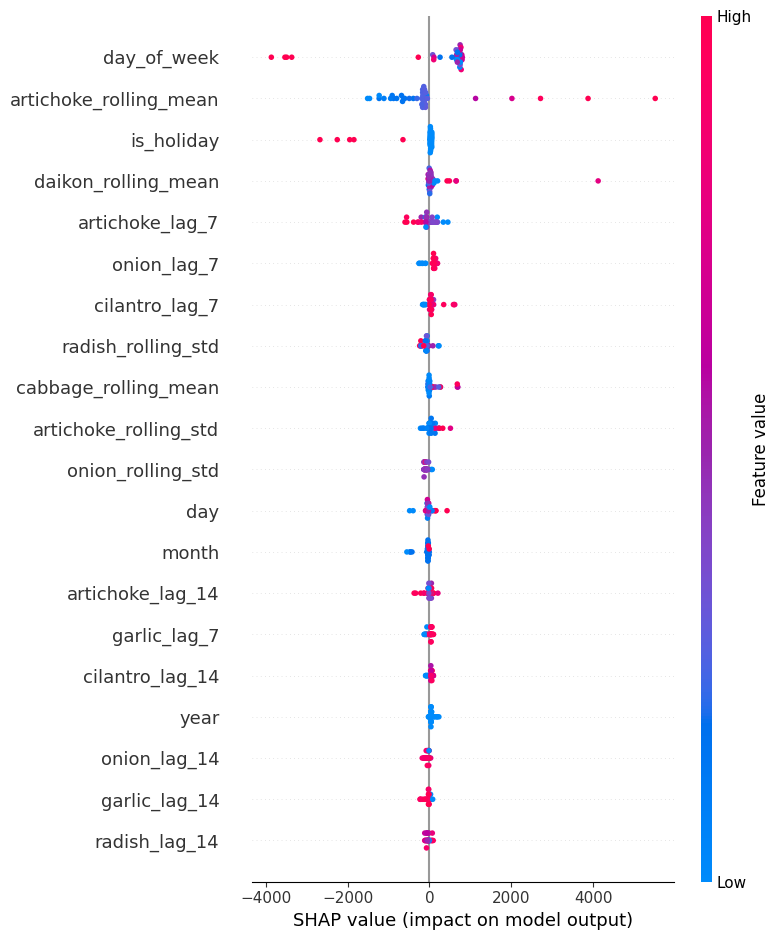

In [ ]:
target = 'artichoke'
model = XGBRegressor().fit(train_data[features], train_data[target])
explainer = shap.TreeExplainer(model, train_data[features])
shap_values = explainer(test_data[features])
shap.summary_plot(shap_values, test_data[features], title=f"SHAP Summary Plot for {target}")

## 3강. 모델 성능 고도화

### 앙상블 모델

#### Average Model
- **설명**: 여러 모델의 예측값을 가중평균하여 예측하는 방식
  - **Reduced Variance**: 여러 모델의 예측값을 평균내면 개별 모델의 편향이나 분산을 줄여 더 견고한 예측을 만들 수 있음
  - **Simplicity**: 구현이 간단하여 앙상블 학습의 시작점으로 적합함

#### Stacking Model
- **설명**: 여러 모델의 예측값을 새로운 피처로 사용하여 재예측을 수행
  - **Improved Performance**: 단순 평균보다 성능을 개선할 수 있으며, 다양한 모델의 장점을 효과적으로 결합하여 예측 성능을 향상시킬 수 있음
  - **Model Integration**: 기본 모델의 예측 간 관계를 명시적으로 모델링하여 더 나은 일반화를 가능하게 함

#### Voting Regressor (Average)


In [ ]:
# 하이브리드용 모델 선언: 성능 높은 모델 위주
models = {
    'RandomForest': RandomForestRegressor(),
    'LGBM': LGBMRegressor(),
    'XGBoost': XGBRegressor()
}

In [ ]:
models

{'RandomForest': RandomForestRegressor(),
 'LGBM': LGBMRegressor(),
 'XGBoost': XGBRegressor(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)}

In [ ]:
def train_models_avg(train_data, test_data, targets, features, models):
    """
    여러 모델을 학습시키고, 예측값을 평균하여 반환하는 함수
    Args:
        train_data (pd.DataFrame): 학습 데이터셋
        test_data (pd.DataFrame): 테스트 데이터셋
        targets (list of str): 타겟 변수 리스트
        features (list of str): 피처 변수 리스트
        models (dict): 모델의 이름과 객체로 구성된 딕셔너리
    Returns:
        dict: 타겟 변수별 예측값의 평균을 포함하는 딕셔너리
    """
    # 모델별 예측값 저장을 위한 딕셔너리 초기화
    predictions = {model_name: {} for model_name in models}

    # 모델 학습 및 예측
    for model_name, model in models.items():
        for target in targets:
            model.fit(train_data[features], train_data[target])
            predictions[model_name][target] = model.predict(test_data[features])

    # 타겟 변수별 예측값 평균 계산
    average_predictions = {}
    for target in targets:
        # 모델별 예측값을 배열로 변환
        all_model_preds = np.array([predictions[model_name][target] for model_name in models])
        # 모델별 예측값의 평균 계산
        average_predictions[target] = np.mean(all_model_preds, axis=0)

    return average_predictions

In [ ]:
average_predictions = train_models_avg(train_data, test_data, targets, features, models)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000702 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7202
[LightGBM] [Info] Number of data points in the train set: 1719, number of used features: 34
[LightGBM] [Info] Start training from score 599.280396
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000843 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7202
[LightGBM] [Info] Number of data points in the train set: 1719, number of used features: 34
[LightGBM] [Info] Start training from score 492.411867
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000749 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7202
[LightGBM] [Info] Number of data points in the train set: 1719, number of used features: 34
[LightGBM] [Info] Start tr

In [ ]:
average_predictions['cabbage'].astype(int)

array([2051, 1897, 1753, 1720, 1484,  690,  912,  894,  782,  807,  773,
        884,  306, 1089, 1025,  876,  779,  670,  572,   19,  640,  653,
        614,  640,  592,  606,    6,  633,  588,  572,  535,  531,  522,
         -2,  538,  522,  482])

In [ ]:
def create_predictions_df_avg(test_data, predictions, targets):
    """
    테스트 데이터셋에 대한 예측값을 포함하는 데이터프레임을 생성하는 함수
    Args:
        test_data (pd.DataFrame): 테스트 데이터셋
        predictions (dict): 타겟별 평균 예측값을 담은 딕셔너리
        targets (list of str): 타겟 변수 리스트
    Returns:
        pd.DataFrame: 예측값이 추가된 테스트 데이터프레임
    """
    # 예측값을 포함할 새로운 데이터프레임 생성
    test_data_predictions = test_data.copy()

    # 각 타겟에 대해 예측값을 데이터프레임에 추가
    for target in targets:
        test_data_predictions[f'{target}_pred_average'] = predictions[target]

    return test_data_predictions

In [ ]:
# 테스트 데이터프레임 생성
test_data_predictions_avg = create_predictions_df_avg(test_data, average_predictions, targets)

In [ ]:
test_data_predictions_avg.head()

,date,cabbage,radish,garlic,onion,daikon,cilantro,artichoke,year,month,...,cilantro_rolling_std,artichoke_rolling_mean,artichoke_rolling_std,cabbage_pred_average,radish_pred_average,garlic_pred_average,onion_pred_average,daikon_pred_average,cilantro_pred_average,artichoke_pred_average
1733,2020-09-29,1787.0,1190.0,5404.0,966.0,2682.0,25873.0,11298.0,2020,9,...,2025.475335,10881.428571,778.741904,2051.975126,1066.436563,5347.915431,968.199468,2707.716252,24435.004645,11599.141961
1734,2020-09-30,1551.0,984.0,5575.0,857.0,2774.0,9929.0,6476.0,2020,9,...,5143.887528,10384.142857,1846.655303,1897.794652,1023.946202,4340.043035,890.067871,2232.791962,23010.751531,10022.551443
1735,2020-10-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020,10,...,9419.550379,8951.571429,4355.046378,1753.112429,934.248311,3938.131162,782.025900,1745.882303,18784.025939,7653.018271
1736,2020-10-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020,10,...,11200.008091,7391.428571,5369.857784,1720.314623,805.731017,2210.245722,431.143913,1547.494451,15338.550161,5312.499033
1737,2020-10-03,0.0,835.0,0.0,0.0,3784.0,0.0,5091.0,2020,10,...,11788.771041,6603.428571,5222.031848,1484.863810,772.371331,1708.985094,395.230143,1398.243882,9213.373413,4162.080189


In [ ]:
# 후처리 함수 적용된 최종 데이터프레임 생성
test_data_predictions_post_avg = apply_post_processing(test_data_predictions_avg, targets)

NameError: name 'apply_post_processing' is not defined

In [ ]:
test_data_predictions_post_avg.head()

,date,cabbage,radish,garlic,onion,daikon,cilantro,artichoke,year,month,...,artichoke_rolling_std,cabbage_pred_average,radish_pred_average,garlic_pred_average,onion_pred_average,daikon_pred_average,cilantro_pred_average,artichoke_pred_average,holiday,is_flag
1733,2020-09-29,1787.0,1190.0,5404.0,966.0,2682.0,25873.0,11298.0,2020,9,...,778.741904,1941.531947,1091.501971,5104.830872,909.592376,2493.329123,23369.215421,11115.949204,0,0
1734,2020-09-30,1551.0,984.0,5575.0,857.0,2774.0,9929.0,6476.0,2020,9,...,1846.655303,1724.836545,984.960883,3806.495711,739.160339,1841.712296,23502.169622,8990.043085,0,0
1735,2020-10-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020,10,...,4355.046378,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1,1
1736,2020-10-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020,10,...,5369.857784,1720.413424,762.137824,1111.915897,205.657165,1239.952506,15783.896665,4396.063721,0,0
1737,2020-10-03,0.0,835.0,0.0,0.0,3784.0,0.0,5091.0,2020,10,...,5222.031848,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1,1


In [ ]:
test_data_predictions_post.head()

,date,cabbage,radish,garlic,onion,daikon,cilantro,artichoke,year,month,...,cilantro_APE_Ridge,cilantro_APE_RandomForest,cilantro_APE_LGBM,cilantro_APE_XGBoost,cilantro_APE_MLP,artichoke_APE_Ridge,artichoke_APE_RandomForest,artichoke_APE_LGBM,artichoke_APE_XGBoost,artichoke_APE_MLP
1733,2020-09-29,1787.0,1190.0,5404.0,966.0,2682.0,25873.0,11298.0,2020,9,...,0.019813,0.056701,0.060012,0.241681,0.017700,0.179480,0.039762,0.004597,0.003051,0.123883
1734,2020-09-30,1551.0,984.0,5575.0,857.0,2774.0,9929.0,6476.0,2020,9,...,1.140874,1.468246,1.760025,0.965027,1.587416,0.704137,0.394671,0.398555,0.234738,0.810756
1735,2020-10-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1736,2020-10-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020,10,...,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf
1737,2020-10-03,0.0,835.0,0.0,0.0,3784.0,0.0,5091.0,2020,10,...,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# get metrics
metrics_post_avg = evaluate_predictions(test_data_predictions_post_avg, targets)
metrics_post_avg[['product', 'model']] = metrics_post_avg['product_model'].str.split('_', expand=True)

In [ ]:
metrics_post_avg

,product_model,MdAPE,product,model
0,cabbage_average,0.896447,cabbage,average
1,radish_average,0.915546,radish,average
2,garlic_average,0.947759,garlic,average
3,onion_average,0.943781,onion,average
4,daikon_average,0.916863,daikon,average
5,cilantro_average,0.815434,cilantro,average
6,artichoke_average,0.947214,artichoke,average


In [ ]:
metrics_post.head()

,product_model,MdAPE,product,model
0,cabbage_Ridge,0.702017,cabbage,Ridge
1,cabbage_RandomForest,0.885828,cabbage,RandomForest
2,cabbage_LGBM,0.843261,cabbage,LGBM
3,cabbage_XGBoost,0.897584,cabbage,XGBoost
4,cabbage_MLP,0.751489,cabbage,MLP


In [ ]:
pd.concat([metrics_post, metrics_post_avg])\
  .pivot(index='product', columns='model', values='MdAPE').round(5)

model,LGBM,MLP,RandomForest,Ridge,XGBoost,average
product,,,,,,
artichoke,0.92451,0.92191,0.92698,0.86274,0.93962,0.94721
cabbage,0.84326,0.75149,0.88583,0.70202,0.89758,0.89645
cilantro,0.75246,0.87299,0.79996,0.84229,0.78540,0.81543
daikon,0.91438,0.89323,0.91961,0.90886,0.91011,0.91686
garlic,0.93251,0.94970,0.95202,0.89710,0.94075,0.94776
onion,0.94393,0.88144,0.95604,0.94004,0.94856,0.94378
radish,0.88048,0.73751,0.91467,0.80715,0.89488,0.91555


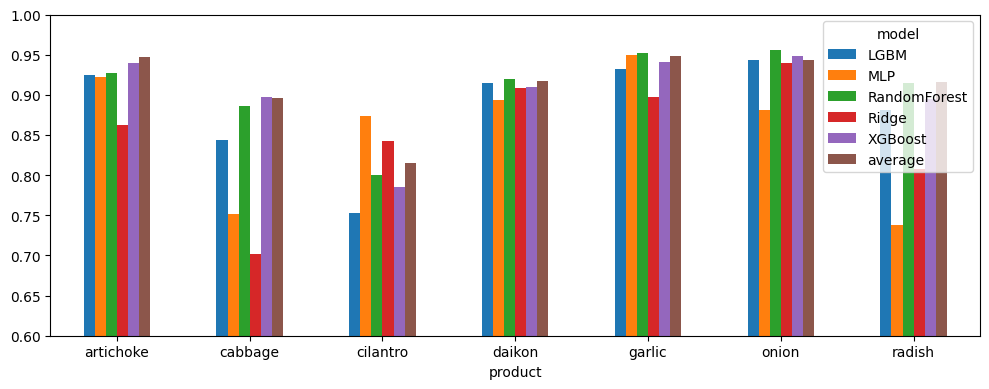

In [ ]:
pd.concat([metrics_post, metrics_post_avg])\
  .pivot(index='product', columns='model', values='MdAPE').round(5)\
  .plot(kind='bar', figsize=(10, 4), rot=0)

plt.ylim(0.6, 1)
plt.tight_layout()

In [ ]:
from sklearn.ensemble import StackingRegressor

In [ ]:
prediction_stack = {}
base_regressors = [
    ('rf', RandomForestRegressor(random_state=42)),
    ('lgbm', LGBMRegressor(random_state=42)),
    ('xgb', XGBRegressor(random_state=42))
]

stacking_regressor = StackingRegressor(
    estimators=base_regressors,
    final_estimator=XGBRegressor()
)

stacking_regressor

StackingRegressor(estimators=[('rf', RandomForestRegressor(random_state=42)),
                              ('lgbm', LGBMRegressor(random_state=42)),
                              ('xgb',
                               XGBRegressor(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gam...
                                               grow_policy=None,
                                               importance_type=None,
                                               interaction_constraints=None,
                                               learning_rate=None, max_bin=None,
                                               max_cat_threshold=None,
                                               max_cat_to_onehot=None,
                                               max_delta_step=None,
                                               max_depth=None, max_leaves=None,
                                               min_child_weight=None,
                                               missing=nan,
                                               monotone_constraints=None,
                                               multi_strategy=None,
                                               n_estimators=None, n_jobs=None,
                                               num_parallel_tree=None,
                                               random_state=None, ...))

In [ ]:
for target in targets:
    stacking_regressor.fit(train_data[features], train_data[target])
    prediction_stack[target] = stacking_regressor.predict(test_data[features])

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000766 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7202
[LightGBM] [Info] Number of data points in the train set: 1719, number of used features: 34
[LightGBM] [Info] Start training from score 599.280396
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000252 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7202
[LightGBM] [Info] Number of data points in the train set: 1375, number of used features: 34
[LightGBM] [Info] Start training from score 569.157091
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000609 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7202
[LightGBM] [Info] Number of data points in the train s

In [ ]:
prediction_stack['cabbage'].astype(int)

array([1577, 1547,  977, 1584, 1558,  540,  538,  817,  563,  751,  806,
        411,    0,  772,  859,  842,  730,  743,  588,    0,  522,  571,
        559,  583,  516,  532,    0,  530,  498,  483,  513,  494,  482,
          0,  507,  477,  437])

In [ ]:
def create_predictions_df_stack(test_data, predictions, targets):
    """
    stack 예측용 테스트 데이터셋에 대한 예측값을 포함하는 데이터프레임을 생성하는 함수
    Args:
        test_data (pd.DataFrame): 테스트 데이터셋
        predictions (dict): 타겟별 평균 예측값을 담은 딕셔너리
        targets (list of str): 타겟 변수 리스트
    Returns:
        pd.DataFrame: 예측값이 추가된 테스트 데이터프레임
    """
    # 예측값을 포함할 새로운 데이터프레임 생성
    test_data_predictions = test_data.copy()

    # 각 타겟에 대해 예측값을 데이터프레임에 추가
    for target in targets:
        test_data_predictions[f'{target}_pred_stack'] = predictions[target]

    return test_data_predictions

In [ ]:
test_data_predictions_stack = create_predictions_df_stack(test_data, prediction_stack, targets)

# post-processing
test_data_predictions_post_stack = apply_post_processing(test_data_predictions_stack, targets)

In [ ]:
test_data_predictions_post_stack.head()

,date,cabbage,radish,garlic,onion,daikon,cilantro,artichoke,year,month,...,artichoke_rolling_std,cabbage_pred_stack,radish_pred_stack,garlic_pred_stack,onion_pred_stack,daikon_pred_stack,cilantro_pred_stack,artichoke_pred_stack,holiday,is_flag
1733,2020-09-29,1787.0,1190.0,5404.0,966.0,2682.0,25873.0,11298.0,2020,9,...,778.741904,1577.642212,1055.127197,5162.010742,1060.986938,2190.569580,31206.882812,7804.586914,0,0
1734,2020-09-30,1551.0,984.0,5575.0,857.0,2774.0,9929.0,6476.0,2020,9,...,1846.655303,1547.950928,1078.751587,4275.458984,1105.788940,1708.415894,31592.390625,9785.332031,0,0
1735,2020-10-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020,10,...,4355.046378,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1,1
1736,2020-10-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020,10,...,5369.857784,1584.639893,967.955261,2.730137,-17.973873,1533.314697,19287.142578,3681.718262,0,0
1737,2020-10-03,0.0,835.0,0.0,0.0,3784.0,0.0,5091.0,2020,10,...,5222.031848,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1,1


In [ ]:
# get metrics
metrics_post_stack = evaluate_predictions(test_data_predictions_post_stack, targets)
metrics_post_stack[['product', 'model']] = metrics_post_stack['product_model'].str.split('_', expand=True)
metrics_post_stack

,product_model,MdAPE,product,model
0,cabbage_stack,0.906148,cabbage,stack
1,radish_stack,0.892248,radish,stack
2,garlic_stack,0.950768,garlic,stack
3,onion_stack,0.941105,onion,stack
4,daikon_stack,0.881155,daikon,stack
5,cilantro_stack,0.724400,cilantro,stack
6,artichoke_stack,0.923352,artichoke,stack


In [ ]:
pd.concat([metrics_post, metrics_post_avg, metrics_post_stack])\
  .pivot(index='product', columns='model', values='MdAPE').round(5)

model,LGBM,MLP,RandomForest,Ridge,XGBoost,average,stack
product,,,,,,,
artichoke,0.92451,0.92191,0.92698,0.86274,0.93962,0.94721,0.92335
cabbage,0.84326,0.75149,0.88583,0.70202,0.89758,0.89645,0.90615
cilantro,0.75246,0.87299,0.79996,0.84229,0.78540,0.81543,0.72440
daikon,0.91438,0.89323,0.91961,0.90886,0.91011,0.91686,0.88116
garlic,0.93251,0.94970,0.95202,0.89710,0.94075,0.94776,0.95077
onion,0.94393,0.88144,0.95604,0.94004,0.94856,0.94378,0.94110
radish,0.88048,0.73751,0.91467,0.80715,0.89488,0.91555,0.89225


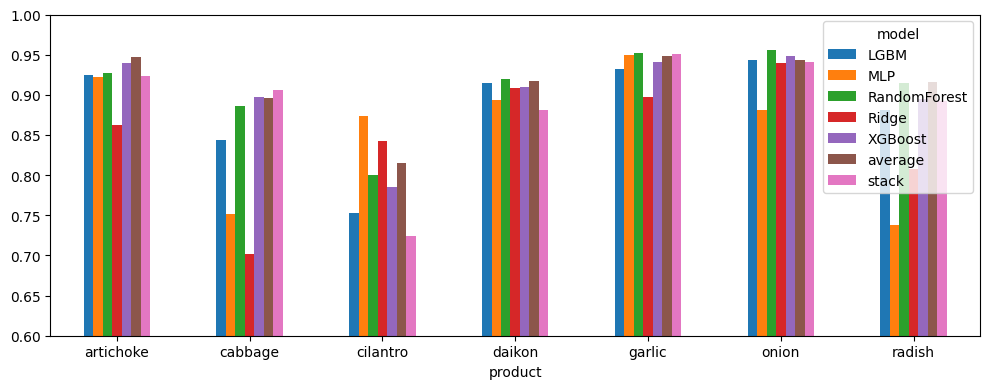

In [ ]:
pd.concat([metrics_post, metrics_post_avg, metrics_post_stack])\
  .pivot(index='product', columns='model', values='MdAPE').round(5)\
  .plot(kind='bar', figsize=(10,4), rot=0)

plt.ylim(0.6, 1)
plt.tight_layout()

### Deep Learning with Pytorch
- MLP Regressor 보다 복잡한 구조 테스트
- Convolutional Neural Networks (CNN), Recurrent Neural Networks (RNN),
- Long Short-Term Memory Networks (LSTM), Gated Recurrent Unit (GRU), Transformer Models

In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import StandardScaler
import numpy as np

# Features and targets setup
target_columns = ['cabbage', 'radish', 'garlic', 'onion', 'daikon', 'cilantro', 'artichoke']
features = [col for col in train_data.columns if col not in ['date'] + target_columns]

# Normalize feature columns
scaler = StandardScaler()
train_data[features] = scaler.fit_transform(train_data[features])
test_data[features] = scaler.transform(test_data[features])

# Dataset class definition
class MyDataset(Dataset):
    def __init__(self, data, target_columns, feature_columns):
        self.features = torch.tensor(data[feature_columns].values, dtype=torch.float32)
        self.targets = torch.tensor(data[target_columns].values, dtype=torch.float32)

    def __len__(self):
        return len(self.features)

    def __getitem__(self, idx):
        return self.features[idx], self.targets[idx]

# Create train and test datasets
train_dataset = MyDataset(train_data, target_columns, features)
test_dataset = MyDataset(test_data, target_columns, features)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64)

# Improved FCNN Model definition
class ImprovedFCNNModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, dropout_rate=0.2):
        super(ImprovedFCNNModel, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(dropout_rate)
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)
        self.fc3 = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.fc3(x)
        return x

# Instantiate model, criterion, optimizer
input_dim = len(features)
hidden_dim = 128
output_dim = len(target_columns)
dropout_rate = 0.3
model = ImprovedFCNNModel(input_dim, hidden_dim, output_dim, dropout_rate)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Early stopping parameters
early_stopping_patience = 10
best_loss = float('inf')
epochs_no_improve = 0

# Training loop with early stopping
num_epochs = 500  # Adjust as needed
for epoch in range(num_epochs):
    model.train()
    for inputs, targets in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

    # Evaluation on test set
    model.eval()
    total_loss = 0.0
    with torch.no_grad():
        for inputs, targets in test_loader:
            outputs = model(inputs)
            total_loss += criterion(outputs, targets).item()
    avg_loss = total_loss / len(test_loader)

    print(f"Epoch {epoch + 1}/{num_epochs}, Test Loss: {avg_loss:.4f}")

    # Early stopping check
    if avg_loss < best_loss:
        best_loss = avg_loss
        epochs_no_improve = 0
        torch.save(model.state_dict(), 'best_model.pt')
    else:
        epochs_no_improve += 1
        if epochs_no_improve >= early_stopping_patience:
            print("Early stopping triggered.")
            break

# Load the best model
model.load_state_dict(torch.load('best_model.pt'))

Epoch 1/500, Test Loss: 57301304.0000
Epoch 2/500, Test Loss: 56944412.0000
Epoch 3/500, Test Loss: 55595228.0000
Epoch 4/500, Test Loss: 52395376.0000
Epoch 5/500, Test Loss: 47339928.0000
Epoch 6/500, Test Loss: 41340348.0000
Epoch 7/500, Test Loss: 35670224.0000
Epoch 8/500, Test Loss: 32619954.0000
Epoch 9/500, Test Loss: 31838646.0000
Epoch 10/500, Test Loss: 31122524.0000
Epoch 11/500, Test Loss: 29227360.0000
Epoch 12/500, Test Loss: 27997932.0000
Epoch 13/500, Test Loss: 26318982.0000
Epoch 14/500, Test Loss: 24723300.0000
Epoch 15/500, Test Loss: 23829704.0000
Epoch 16/500, Test Loss: 22696148.0000
Epoch 17/500, Test Loss: 21725858.0000
Epoch 18/500, Test Loss: 20886064.0000
Epoch 19/500, Test Loss: 20322364.0000
Epoch 20/500, Test Loss: 19895472.0000
Epoch 21/500, Test Loss: 19155826.0000
Epoch 22/500, Test Loss: 19218144.0000
Epoch 23/500, Test Loss: 18892028.0000
Epoch 24/500, Test Loss: 18822100.0000
Epoch 25/500, Test Loss: 18320222.0000
Epoch 26/500, Test Loss: 18338288.

<All keys matched successfully>

In [ ]:
# Generate predictions
model.eval()
predictions = {target: [] for target in target_columns}
real_values = {target: [] for target in target_columns}

with torch.no_grad():
    for inputs, targets in test_loader:
        outputs = model(inputs)
        for i, target in enumerate(target_columns):
            predictions[target].extend(outputs[:, i].numpy())
            real_values[target].extend(targets[:, i].numpy())

# Convert predictions and real values into DataFrames for easier plotting
pred_df = pd.DataFrame(predictions)
real_df = pd.DataFrame(real_values)
date_series = test_data['date'].reset_index(drop=True)

# Add date to the DataFrames
pred_df['date'] = date_series
real_df['date'] = date_series

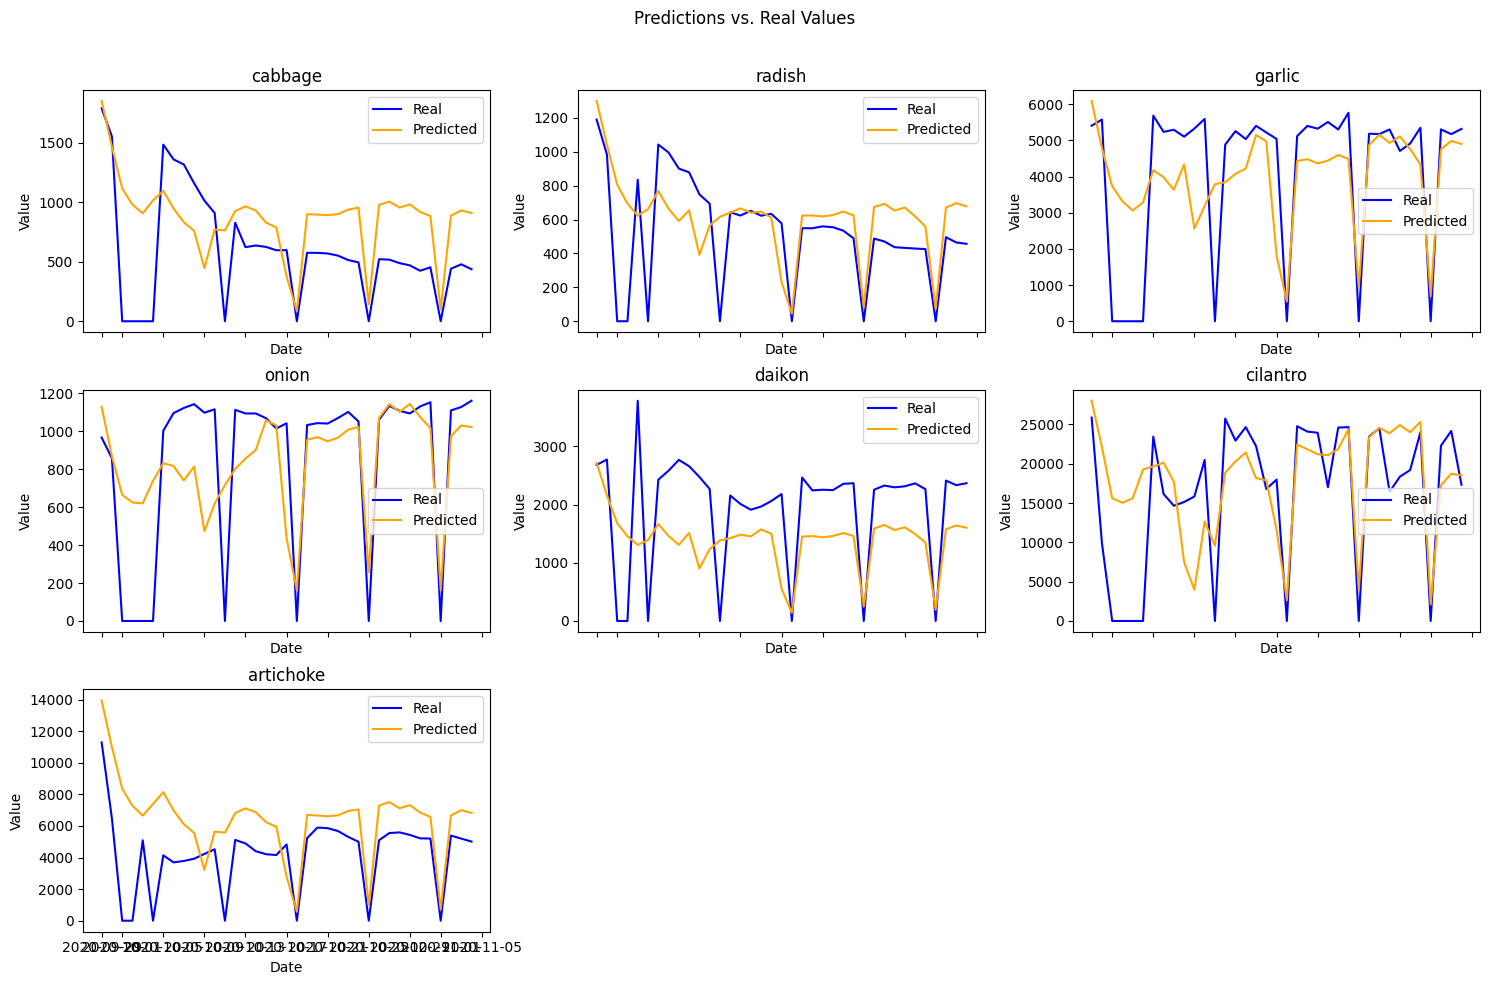

In [ ]:
# Plot predictions vs. real values
def plot_predictions_vs_real(pred_df, real_df, targets):
    num_products = len(targets)
    num_cols = 3
    num_rows = (num_products + num_cols - 1) // num_cols
    fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 10), sharex=True)
    axes = axes.flatten()

    for i, target in enumerate(targets):
        ax = axes[i]
        ax.plot(real_df['date'], real_df[target], label='Real', color='blue')
        ax.plot(pred_df['date'], pred_df[target], label='Predicted', color='orange')
        ax.set_title(target)
        ax.set_xlabel('Date')
        ax.set_ylabel('Value')
        ax.legend()

    # Hide any unused subplots
    for j in range(i + 1, len(axes)):
        axes[j].set_visible(False)

    plt.tight_layout()
    plt.subplots_adjust(top=0.9)
    plt.suptitle("Predictions vs. Real Values")
    plt.show()

plot_predictions_vs_real(pred_df, real_df, target_columns)

- NOTE
- 딥러닝의 한계 및 적절한 사용 사례
- **표 형식 데이터와 딥러닝**: 일반적으로 딥러닝은 표 형식(tabular) 데이터에 적합하지 않은 경우가 많음
- **적합한 데이터 유형**: 딥러닝은 방대한 양의 비정형 데이터(예: 이미지, 텍스트)에 대해 더 높은 성능을 발휘한다.
- **제약 사항**:
  - 연산량이 많아 학습 시간이 오래 걸린다.
  - 유지보수가 어렵고 GPU 장비가 필수적이어서 비용과 인프라 요구가 높다.
  - 실전 예측 문제에서는 사용이 어려운 경우가 많다.
- **적용 사례**: 최근에는 대형 언어 모델(LLM) 및 이미지 생성 모델 등 생성 AI(Generative AI) 개발에 주로 적용되는 추세

## 포트폴리오 구축 with Streamlit


In [ ]:
data.head()

,date,cabbage,radish,garlic,onion,daikon,cilantro,artichoke,year,month,...,garlic_rolling_mean,garlic_rolling_std,onion_rolling_mean,onion_rolling_std,daikon_rolling_mean,daikon_rolling_std,cilantro_rolling_mean,cilantro_rolling_std,artichoke_rolling_mean,artichoke_rolling_std
0,2016-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2016,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2016-01-02,329.0,360.0,5475.0,1281.0,1704.0,11000.0,13242.0,2016,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2016-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2016,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2016-01-04,478.0,382.0,5210.0,1235.0,1716.0,4464.0,9923.0,2016,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2016-01-05,442.0,422.0,5387.0,1213.0,1715.0,4342.0,9529.0,2016,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
targets = ['cabbage', 'radish', 'garlic', 'onion', 'daikon', 'cilantro', 'artichoke']

In [ ]:
real = data.set_index('date')[targets].reset_index()
real

,date,cabbage,radish,garlic,onion,daikon,cilantro,artichoke
0,2016-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2016-01-02,329.0,360.0,5475.0,1281.0,1704.0,11000.0,13242.0
2,2016-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2016-01-04,478.0,382.0,5210.0,1235.0,1716.0,4464.0,9923.0
4,2016-01-05,442.0,422.0,5387.0,1213.0,1715.0,4342.0,9529.0
...,...,...,...,...,...,...,...,...
1765,2020-10-31,453.0,426.0,5348.0,1152.0,2265.0,24013.0,5204.0
1766,2020-11-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1767,2020-11-02,441.0,496.0,5303.0,1109.0,2412.0,22287.0,5395.0
1768,2020-11-03,478.0,465.0,5172.0,1127.0,2334.0,24178.0,5201.0


In [ ]:
test_data_predictions_post.head()

,date,cabbage,radish,garlic,onion,daikon,cilantro,artichoke,year,month,...,cilantro_APE_Ridge,cilantro_APE_RandomForest,cilantro_APE_LGBM,cilantro_APE_XGBoost,cilantro_APE_MLP,artichoke_APE_Ridge,artichoke_APE_RandomForest,artichoke_APE_LGBM,artichoke_APE_XGBoost,artichoke_APE_MLP
1733,2020-09-29,1787.0,1190.0,5404.0,966.0,2682.0,25873.0,11298.0,2020,9,...,0.019813,0.056701,0.060012,0.241681,0.017700,0.179480,0.039762,0.004597,0.003051,0.123883
1734,2020-09-30,1551.0,984.0,5575.0,857.0,2774.0,9929.0,6476.0,2020,9,...,1.140874,1.468246,1.760025,0.965027,1.587416,0.704137,0.394671,0.398555,0.234738,0.810756
1735,2020-10-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1736,2020-10-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020,10,...,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf
1737,2020-10-03,0.0,835.0,0.0,0.0,3784.0,0.0,5091.0,2020,10,...,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
pred_cols = [col for col in test_data_predictions_post.columns if 'pred' in col or 'date' in col]
pred_cols_avg = [col for col in test_data_predictions_post_avg.columns if 'pred' in col or 'date' in col]
pred_cols_stack = [col for col in test_data_predictions_post_stack.columns if 'pred' in col or 'date' in col]

In [ ]:
pred_cols_avg

['date',
 'cabbage_pred_average',
 'radish_pred_average',
 'garlic_pred_average',
 'onion_pred_average',
 'daikon_pred_average',
 'cilantro_pred_average',
 'artichoke_pred_average']

In [ ]:
pred = test_data_predictions_post[pred_cols]
pred_avg = test_data_predictions_post_avg[pred_cols_avg]
pred_stack = test_data_predictions_post_stack[pred_cols_stack]

In [ ]:
pred_avg.head()

,date,cabbage_pred_average,radish_pred_average,garlic_pred_average,onion_pred_average,daikon_pred_average,cilantro_pred_average,artichoke_pred_average
1733,2020-09-29,1941.531947,1091.501971,5104.830872,909.592376,2493.329123,23369.215421,11115.949204
1734,2020-09-30,1724.836545,984.960883,3806.495711,739.160339,1841.712296,23502.169622,8990.043085
1735,2020-10-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1736,2020-10-02,1720.413424,762.137824,1111.915897,205.657165,1239.952506,15783.896665,4396.063721
1737,2020-10-03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [ ]:
real = real.merge(pred, on='date', how='left')\
           .merge(pred_avg, on='date', how='left')\
           .merge(pred_stack, on='date', how='left')

In [ ]:
real.tail()

,date,cabbage,radish,garlic,onion,daikon,cilantro,artichoke,cabbage_pred_Ridge,radish_pred_Ridge,...,daikon_pred_average,cilantro_pred_average,artichoke_pred_average,cabbage_pred_stack,radish_pred_stack,garlic_pred_stack,onion_pred_stack,daikon_pred_stack,cilantro_pred_stack,artichoke_pred_stack
1765,2020-10-31,453.0,426.0,5348.0,1152.0,2265.0,24013.0,5204.0,513.722689,443.535349,...,1998.523728,27288.478100,5435.679218,482.082245,435.836700,5117.765137,1132.898071,1995.815308,18488.087891,5640.291504
1766,2020-11-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1767,2020-11-02,441.0,496.0,5303.0,1109.0,2412.0,22287.0,5395.0,579.208919,520.568444,...,2282.154191,21671.584072,5475.934628,507.295563,449.814758,5143.944336,1106.874023,2058.502686,15191.690430,5191.119141
1768,2020-11-03,478.0,465.0,5172.0,1127.0,2334.0,24178.0,5201.0,602.498615,523.190346,...,2260.385199,19778.740092,5282.925636,477.301941,530.950134,5438.710449,998.149414,2163.634521,20016.302734,5203.370117
1769,2020-11-04,437.0,457.0,5316.0,1160.0,2367.0,17324.0,5013.0,550.397299,501.105125,...,2250.801277,20566.704314,5209.842709,437.734375,436.163330,5428.699219,1112.089233,2372.333252,18203.164062,5018.116211


In [ ]:
real.columns

Index(['date', 'cabbage', 'radish', 'garlic', 'onion', 'daikon', 'cilantro',
       'artichoke', 'cabbage_pred_Ridge', 'radish_pred_Ridge',
       'garlic_pred_Ridge', 'onion_pred_Ridge', 'daikon_pred_Ridge',
       'cilantro_pred_Ridge', 'artichoke_pred_Ridge',
       'cabbage_pred_RandomForest', 'radish_pred_RandomForest',
       'garlic_pred_RandomForest', 'onion_pred_RandomForest',
       'daikon_pred_RandomForest', 'cilantro_pred_RandomForest',
       'artichoke_pred_RandomForest', 'cabbage_pred_LGBM', 'radish_pred_LGBM',
       'garlic_pred_LGBM', 'onion_pred_LGBM', 'daikon_pred_LGBM',
       'cilantro_pred_LGBM', 'artichoke_pred_LGBM', 'cabbage_pred_XGBoost',
       'radish_pred_XGBoost', 'garlic_pred_XGBoost', 'onion_pred_XGBoost',
       'daikon_pred_XGBoost', 'cilantro_pred_XGBoost',
       'artichoke_pred_XGBoost', 'cabbage_pred_MLP', 'radish_pred_MLP',
       'garlic_pred_MLP', 'onion_pred_MLP', 'daikon_pred_MLP',
       'cilantro_pred_MLP', 'artichoke_pred_MLP', 'cabbage_p

In [ ]:
real.shape

(1770, 57)

<Axes: xlabel='date'>

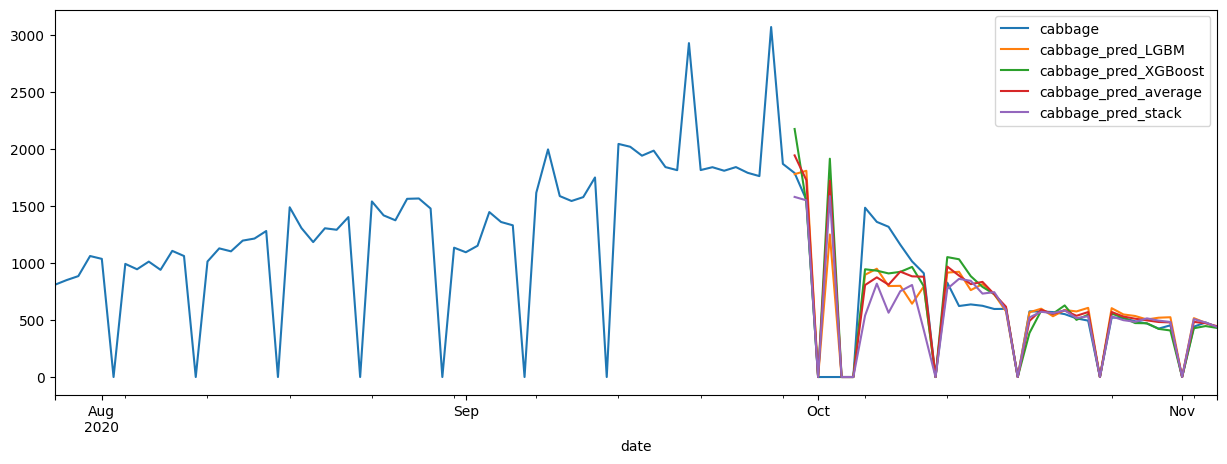

In [ ]:
real[['date', 'cabbage', 'cabbage_pred_LGBM', 'cabbage_pred_XGBoost', 'cabbage_pred_average', 'cabbage_pred_stack']][-100:].set_index("date").plot(figsize=(15, 5))

In [ ]:
file_path = '/content/drive/MyDrive/data/streamlit_data.csv'

real.to_csv(file_path, index=False)

In [ ]:
metric_summay = pd.concat([metrics_post, metrics_post_avg, metrics_post_stack])\
  .pivot(index='product', columns='model', values='MdAPE').round(5).reset_index()

In [ ]:
metric_summay

model,product,LGBM,MLP,RandomForest,Ridge,XGBoost,average,stack
0,artichoke,0.92451,0.92191,0.92698,0.86274,0.93962,0.94721,0.92335
1,cabbage,0.84326,0.75149,0.88583,0.70202,0.89758,0.89645,0.90615
2,cilantro,0.75246,0.87299,0.79996,0.84229,0.78540,0.81543,0.72440
3,daikon,0.91438,0.89323,0.91961,0.90886,0.91011,0.91686,0.88116
4,garlic,0.93251,0.94970,0.95202,0.89710,0.94075,0.94776,0.95077
5,onion,0.94393,0.88144,0.95604,0.94004,0.94856,0.94378,0.94110
6,radish,0.88048,0.73751,0.91467,0.80715,0.89488,0.91555,0.89225


In [ ]:
file_path = '/content/drive/MyDrive/data/metric_summary.csv'

metric_summay.to_csv(file_path, index=False)

### Streamlirt 대시보드 배포
- 아래코드를 로컬에 저장하고 streamlit 으로 로컬서버로 띄우기
- 로컬에서 정상작동하면 깃헙에 코드를 올리고 배포진행

In [ ]:
import streamlit as st
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

csv_file_path = 'data/streamlit_data.csv'

@st.cache_data
def load_data(file_path):
    return pd.read_csv(file_path)

df = load_data(csv_file_path)

if 'date' in df.columns:
    df['date'] = pd.to_datetime(df['date'])
    df.set_index('date', inplace=True)
else:
    st.error("Date column not found in the CSV file.")

def preprocess_data(df):
    cutoff_date = pd.to_datetime('2020-09-28')
    cols_to_zero = ['cabbage', 'radish', 'garlic', 'onion', 'daikon', 'cilantro', 'artichoke']
    df.loc[df.index > cutoff_date, cols_to_zero] = np.nan
    return df

def plot_predictions_over_time(df, vegetables, rolling_mean_window):
    fig, ax = plt.subplots(figsize=(14, 7))

    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
    num_colors = len(colors)

    for i, veg in enumerate(vegetables):
        ax.plot(df.index, df[veg], label=veg, linewidth=2, color=colors[i % num_colors])
        rolling_mean = df[veg].rolling(window=rolling_mean_window).mean()
        ax.plot(df.index, rolling_mean, label=f'{veg} ({rolling_mean_window}-day Rolling Mean)', linestyle='--', color=colors[i % num_colors])

    ax.set_xlabel('Date', fontsize=14)
    ax.set_ylabel('Price', fontsize=14)
    ax.legend(fontsize=12)
    ax.grid(True, color='lightgrey', linestyle='--')
    fig.tight_layout()
    st.pyplot(fig)


df = preprocess_data(df)

metric_file_path = 'data/metric_summary.csv'

metric_summary = pd.read_csv(metric_file_path)
metric_summary.set_index('product', inplace=True)

st.title('🍇농산물 가격 예측 대시보드🥭')
st.markdown("""
    왼쪽에서 품목과 예측모델, 날짜를 입력하면 특정기간 이후 예측 가격이 표시됩니다.
    """)

st.sidebar.title('조회 기간')
start_date = st.sidebar.date_input('시작일', df.index.min())
end_date = st.sidebar.date_input('마지막일', df.index.max())

st.sidebar.title('품목을 선택해주세요')
sorted_vegetables = sorted(df.columns)
vegetables = st.sidebar.multiselect('조회 품목:', sorted_vegetables)
rolling_mean_window = st.sidebar.slider('Rolling Mean Window', min_value=1, max_value=30, value=7)

st.sidebar.markdown("""
| Korean | English    |
|--------|------------|
| 배추   | cabbage    |
| 무     | radish     |
| 마늘   | garlic     |
| 양파   | onion      |
| 대파   | daikon     |
| 건고추 | cilantro   |
| 깻잎   | artichoke  |
""")

filtered_df = df.loc[start_date:end_date]

if vegetables:
    st.subheader('품목별 예측 대시보드')
    plot_predictions_over_time(filtered_df, vegetables, rolling_mean_window)

if st.checkbox('Show Filtered DataFrame'):
    st.write(filtered_df)

st.subheader('정확도 Summary')
st.write(metric_summary)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
